# Analisis precio Oro 2000 - 2020

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
from pandas import read_csv
import numpy as np

from pandas import Series
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [28]:

data = pd.read_excel('Goldprice.xlsx')
#df.index.freq = 'MS'
data.head()
data=data[['Fecha','USdollar']]
type(data) # tipo
print(data)
print('\n Data Types:')
print(data.dtypes)

len(data)

Fecha  USdollar   Euro  Japaneseyen
0  2000-1     284.3  280.9      29969.8
1  2000-2     299.9  304.9      32820.3
2  2000-3     286.4  296.8      30451.5
3  2000-4     279.7  295.4      29544.7
4  2000-5     275.2  304.0      29797.8

pandas.core.frame.DataFrame

       Fecha  USdollar
0     2000-1     284.3
1     2000-2     299.9
2     2000-3     286.4
3     2000-4     279.7
4     2000-5     275.2
..       ...       ...
247   2020-8    1968.6
248   2020-9    1922.2
249  2020-10    1900.3
250  2020-11    1863.5
251  2020-12    1856.0

[252 rows x 2 columns]

 Data Types:
Fecha        object
USdollar    float64
dtype: object


252

Fecha
2000-01-01    284.3
2000-02-01    299.9
2000-03-01    286.4
2000-04-01    279.7
2000-05-01    275.2
2000-06-01    285.7
2000-07-01    281.6
2000-08-01    274.5
2000-09-01    273.7
2000-10-01    270.0
Name: USdollar, dtype: float64

Text(0.5, 1.0, 'USdollar/ORO')

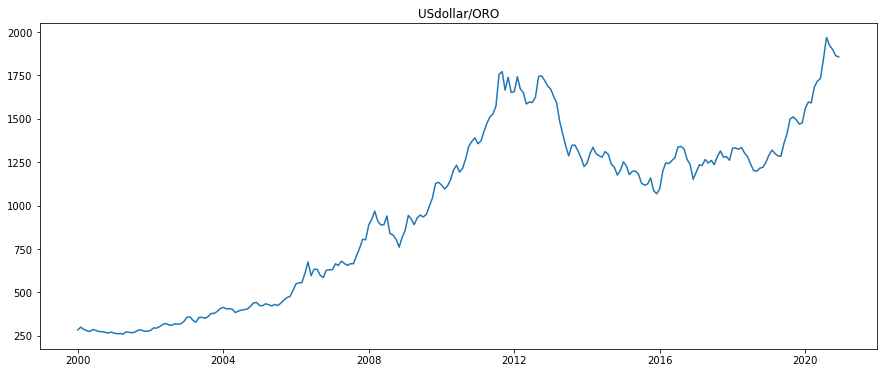

In [29]:
######Convertir el conjunto de datos en una serie de Tiempo#####

con=data['Fecha']
data['Fecha']=pd.to_datetime(data['Fecha'])
##data.set_index('Month', inplace=True)
PrecioOro=data.set_index('Fecha')
#check datatype of index

#convert to time series:
ts = PrecioOro['USdollar']
ts.head(10)

####Graficar la Serie#####
plt.plot(ts)
plt.title('USdollar/ORO') 


In [30]:
ts.index
#type(pasajeros)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Fecha', length=252, freq=None)

In [31]:
PrecioOro.index.freq='MS'

ts.index.freq='MS'
ts.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Fecha', length=252, freq='MS')

In [32]:
PrecioOro['USdollar']

Fecha
2000-01-01     284.3
2000-02-01     299.9
2000-03-01     286.4
2000-04-01     279.7
2000-05-01     275.2
               ...  
2020-08-01    1968.6
2020-09-01    1922.2
2020-10-01    1900.3
2020-11-01    1863.5
2020-12-01    1856.0
Freq: MS, Name: USdollar, Length: 252, dtype: float64

# Analisis descriptivo

## Transformación Box-Cox

(array([ 78.6725935 ,  81.79787332,  79.09608119,  77.74184313,
        76.82712232,  78.95501664,  78.12680504,  76.68445306,
        76.52127624,  75.76481765,  74.94371395,  76.07184168,
        74.84083096,  74.09844507,  74.32559008,  73.80896024,
        76.25582547,  75.80578204,  75.25203489,  76.25582547,
        78.49082779,  78.4302029 ,  77.03075742,  76.96968885,
        78.10656226,  80.92114713,  80.64141519,  82.35389284,
        84.68133357,  85.99181913,  84.44578855,  83.8558048 ,
        85.58191029,  85.09292597,  85.58191029,  88.06875965,
        92.84913521,  93.24629068,  89.7435351 ,  87.35274071,
        92.62189216,  92.75447695,  91.72975652,  93.39741481,
        96.99646004,  96.97785079,  99.01663252, 102.15400129,
       103.39118311, 101.77075037, 102.09928551, 101.47837175,
        97.88807759,  99.47770788, 100.52586247, 100.96591723,
       101.84379386, 104.6045519 , 107.99825269, 108.47965889,
       105.23622185, 105.12804076, 107.08663676, 106.1

(array([ 78.6725935 ,  81.79787332,  79.09608119,  77.74184313,
         76.82712232,  78.95501664,  78.12680504,  76.68445306,
         76.52127624,  75.76481765,  74.94371395,  76.07184168,
         74.84083096,  74.09844507,  74.32559008,  73.80896024,
         76.25582547,  75.80578204,  75.25203489,  76.25582547,
         78.49082779,  78.4302029 ,  77.03075742,  76.96968885,
         78.10656226,  80.92114713,  80.64141519,  82.35389284,
         84.68133357,  85.99181913,  84.44578855,  83.8558048 ,
         85.58191029,  85.09292597,  85.58191029,  88.06875965,
         92.84913521,  93.24629068,  89.7435351 ,  87.35274071,
         92.62189216,  92.75447695,  91.72975652,  93.39741481,
         96.99646004,  96.97785079,  99.01663252, 102.15400129,
        103.39118311, 101.77075037, 102.09928551, 101.47837175,
         97.88807759,  99.47770788, 100.52586247, 100.96591723,
        101.84379386, 104.6045519 , 107.99825269, 108.47965889,
        105.23622185, 105.12804076, 107.

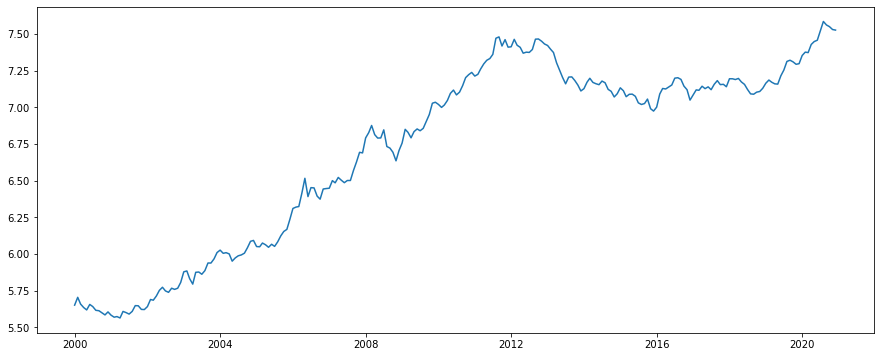

In [33]:
#####Transformación Box-Cox
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
print(sp.stats.boxcox(ts,alpha=0.05))
sp.stats.boxcox(PrecioOro['USdollar'],alpha=0.05)
logGold=sp.stats.boxcox(PrecioOro['USdollar'],lmbda=0)
data = data.assign(logGold=logGold)   

logoro=data.set_index('Fecha')   
logORO = logoro['logGold'] 
plt.plot(logORO)

Text(0.5, 1.0, 'USdollar/ORO')

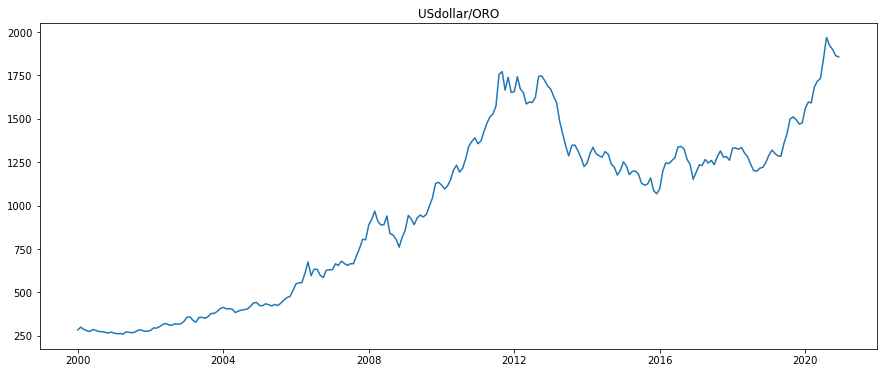

In [34]:
plt.plot(ts)
plt.title('USdollar/ORO') 

Text(0.5, 1.0, 'Serie con Tranformación Box-Cox Ln')

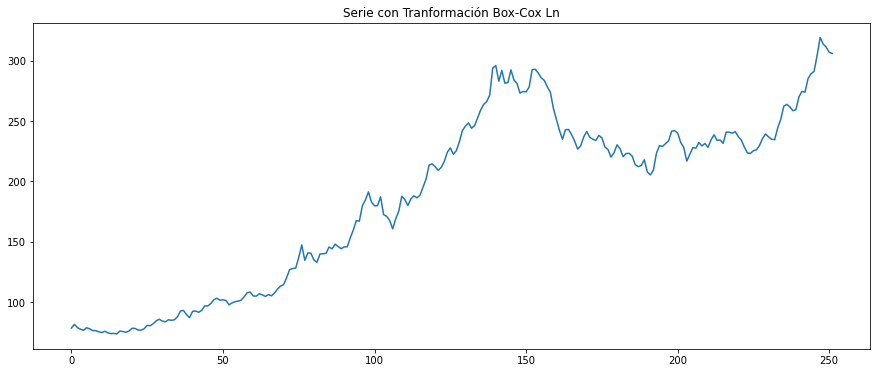

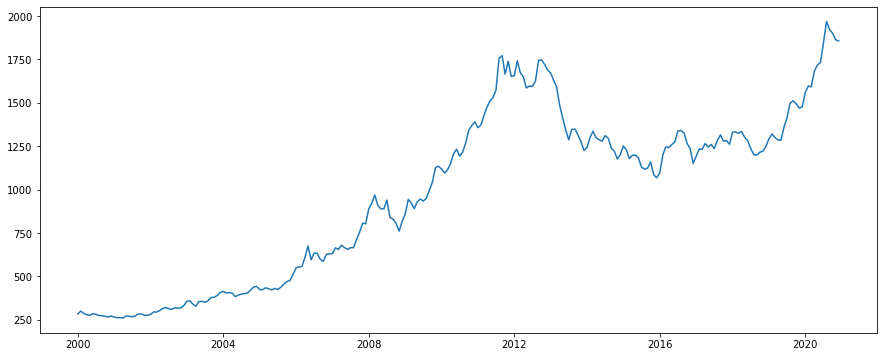

In [35]:
logsub_dollar=sp.stats.boxcox(ts,lmbda=0.7167935449104177)
  
plt.plot(logsub_dollar)
plt.title('Serie con Tranformación Box-Cox Ln') 
plt.show()
plt.plot(ts)

Observamos que el intervalo no captura el uno o el cero, por lo tanto realizamos la transformacion con  𝜆 =0.7167935449104177 para verificar, observamos que la transformacion no surge efecto y solo cambia la escala, por lo tanto decidimos no transforma la serie

## Analisis de tendencias

Text(0.5, 1.0, 'precio Oro')

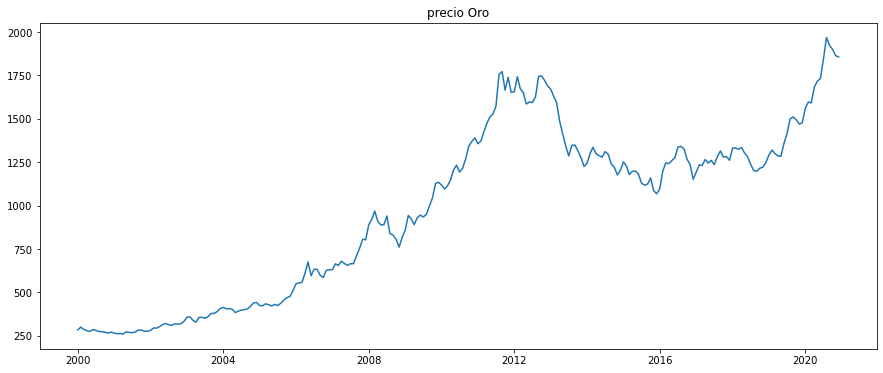

In [36]:
plt.plot(ts)
plt.title('precio Oro') 

### Tendencia determinísticas
buscamos la funcion deterministica que sigue la tendencia

In [37]:
X1=np.arange(2000,2020+12/12,1/12)
X=X1

LinearRegression()

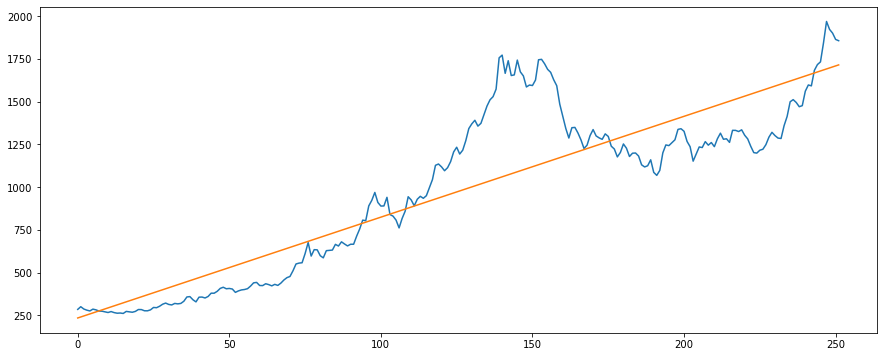

array([70.77907455])

-141324.13145413573

In [38]:
from sklearn.linear_model import LinearRegression

X = np.reshape(X, (len(X), 1))
y = ts.values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)
plt.show()
model.coef_
model.intercept_

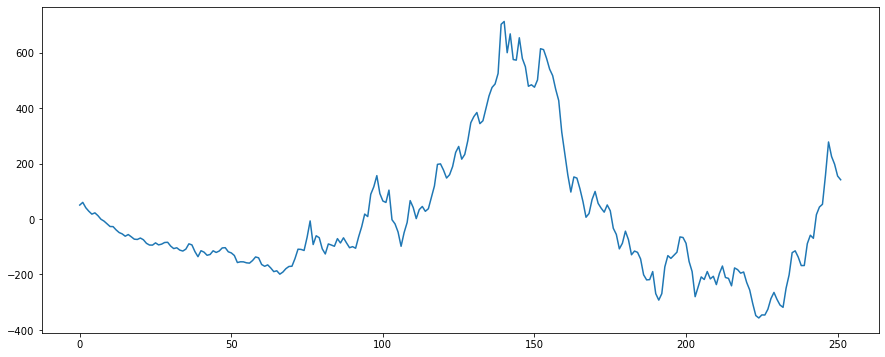

In [39]:
# sin tendencia
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(ts))]
# plot detrended
plt.plot(detrended)
plt.show()
PO_detrend=pd.Series(detrended,index=ts.index)

In [40]:
import statsmodels.api as sm

X = sm.add_constant(X)
linmodel = sm.OLS(y, X)
results = linmodel.fit()
print(results.summary())
ypred = results.predict(X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     864.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.98e-83
Time:                        12:54:09   Log-Likelihood:                -1728.7
No. Observations:                 252   AIC:                             3461.
Df Residuals:                     250   BIC:                             3469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.413e+05   4838.848    -29.206      0.0

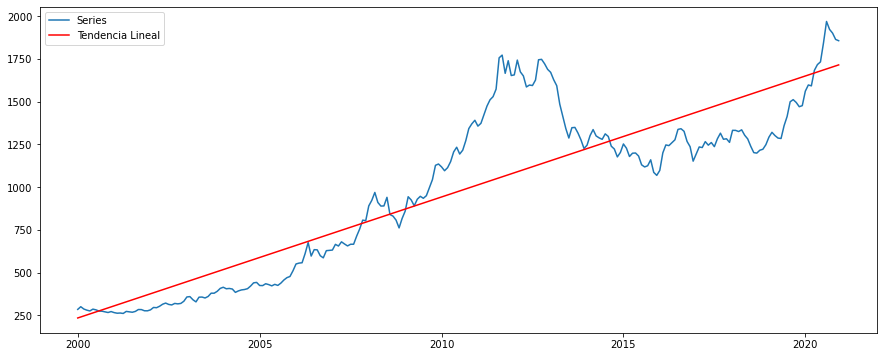

In [41]:
fig, ax = plt.subplots()
ax.plot(X1, y, '-', label="Series")
ax.plot(X1, ypred, 'r', label="Tendencia Lineal")
ax.legend(loc="best");

### Diferenciacion

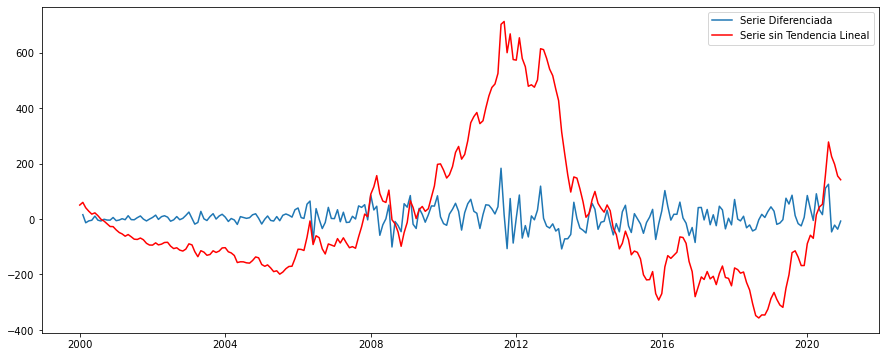

In [42]:
dif_ts=ts.diff(periods=1)

fig, ax = plt.subplots()
ax.plot(dif_ts, '-', label="Serie Diferenciada")
ax.plot(PO_detrend, 'r', label="Serie sin Tendencia Lineal")
ax.legend(loc="best");


como se habia visto anterirormente la serie tiene una tendencia lineal creciente, obtenemos dos series sin tendencia, una restandole la tendencia obtenida anteriormente y otra diferenciandola, observamos que la serie diferenciada se aproxima mejor al comportamiento estacionario, que buscamos para poder modelar

## Periodograma

1
0.003968253968253968
252.0


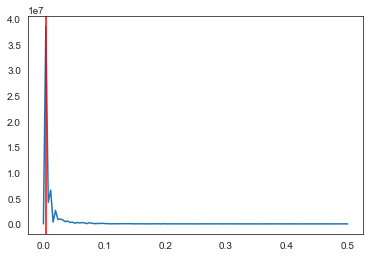

In [263]:
f, Pxx_den=sp.signal.periodogram(PrecioOro['USdollar'])
plt.plot(f, Pxx_den)
plt.axvline(x=1/252,color='red')
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)
print(1/frecuencia_max)

observamos que no hay presencia de ciclo, pues el periodograma alcanza un maximo en 1/252 (252 longitud de los datos de entrenamiento)

## Graficos de  autocorrelacion simple

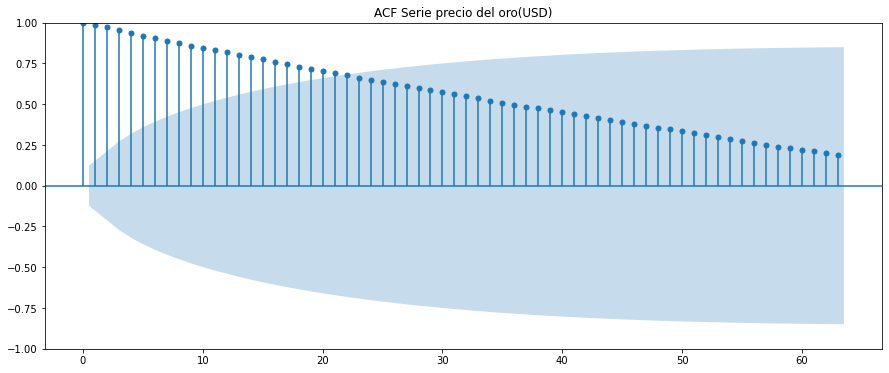

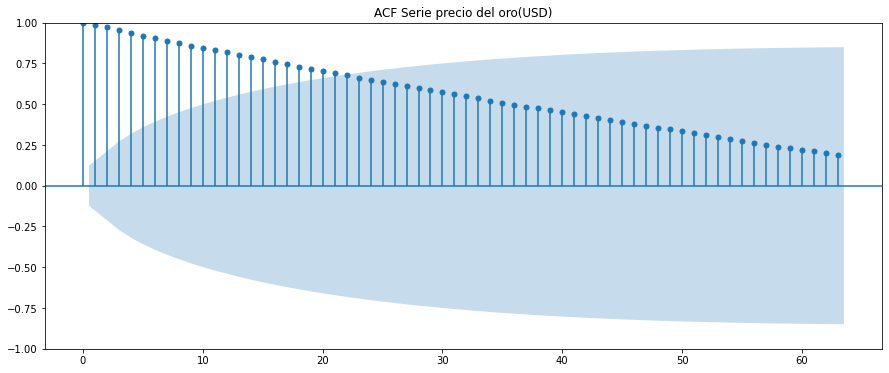

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts,adjusted=False,lags=(len(ts)/4),title='ACF Serie precio del oro(USD)')

La serie tiene una correlación con los primeros rezagos, además esta va disminuyendo a cero muy lento, por lo que nos podria sugerir en la modelación ARMA que exista una raiz unitaria.

## Grafico de retardos


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 't vs t-1')

<AxesSubplot:title={'center':'t vs t-1'}>

Text(0.5, 1.0, 't vs t-2')

<AxesSubplot:title={'center':'t vs t-2'}>

Text(0.5, 1.0, 't vs t-3')

<AxesSubplot:title={'center':'t vs t-3'}>

Text(0.5, 1.0, 't vs t-4')

<AxesSubplot:title={'center':'t vs t-4'}>

Text(0.5, 1.0, 't vs t-5')

<AxesSubplot:title={'center':'t vs t-5'}>

Text(0.5, 1.0, 't vs t-6')

<AxesSubplot:title={'center':'t vs t-6'}>

Text(0.5, 1.0, 't vs t-7')

<AxesSubplot:title={'center':'t vs t-7'}>

Text(0.5, 1.0, 't vs t-8')

<AxesSubplot:title={'center':'t vs t-8'}>

Text(0.5, 1.0, 't vs t-9')

<AxesSubplot:title={'center':'t vs t-9'}>

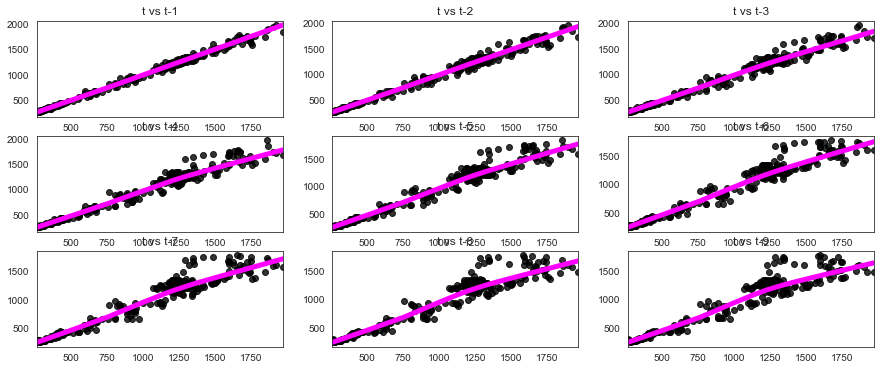

In [45]:
import seaborn as sns
sns.set_style("white")
from pandas.plotting import scatter_matrix
values = pd.DataFrame(ts.values)
lags = 9
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(330 + i)
	ax.set_title('t vs t-' + str(i))
	sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="black",lowess=True, 
            line_kws={"color":"magenta", "linewidth":5})
plt.show()

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 't vs t-10')

<AxesSubplot:title={'center':'t vs t-10'}>

Text(0.5, 1.0, 't vs t-11')

<AxesSubplot:title={'center':'t vs t-11'}>

Text(0.5, 1.0, 't vs t-12')

<AxesSubplot:title={'center':'t vs t-12'}>

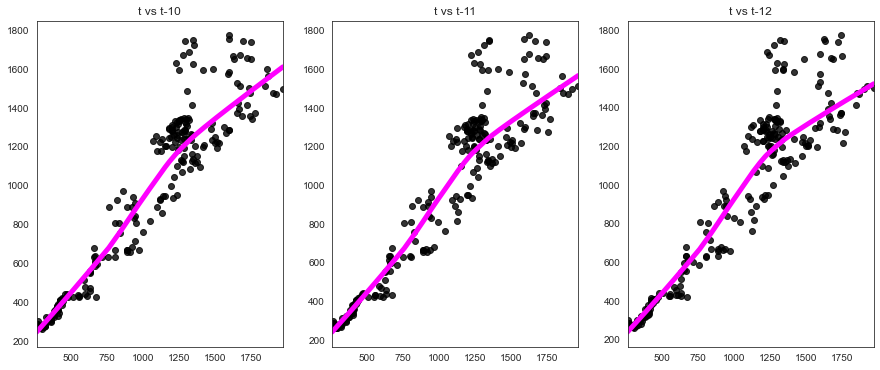

In [46]:
import seaborn as sns
sns.set_style("white")
from pandas.plotting import scatter_matrix
values = pd.DataFrame(ts.values)
lags = 3
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i+9))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(130 + i)
	ax.set_title('t vs t-' + str(i+9))
	sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="black",lowess=True, 
            line_kws={"color":"magenta", "linewidth":5})
plt.show()

## division de los datos en conjuntos de entrenamiento y prueba


In [47]:
n = len(ts)
n

252

In [48]:
n = len(ts)
train_ts = ts[0:int(n*0.85)]
test_ts = ts[int(n*0.85):int(n)]

In [49]:
ts

Fecha
2000-01-01     284.3
2000-02-01     299.9
2000-03-01     286.4
2000-04-01     279.7
2000-05-01     275.2
               ...  
2020-08-01    1968.6
2020-09-01    1922.2
2020-10-01    1900.3
2020-11-01    1863.5
2020-12-01    1856.0
Freq: MS, Name: USdollar, Length: 252, dtype: float64

In [52]:
train_ts
len(train_ts)

Fecha
2000-01-01     284.3
2000-02-01     299.9
2000-03-01     286.4
2000-04-01     279.7
2000-05-01     275.2
               ...  
2017-06-01    1260.3
2017-07-01    1236.2
2017-08-01    1282.3
2017-09-01    1315.0
2017-10-01    1279.5
Freq: MS, Name: USdollar, Length: 214, dtype: float64

214

In [54]:
test_ts
len(test_ts)

Fecha
2017-11-01    1282.3
2017-12-01    1261.3
2018-01-01    1331.7
2018-02-01    1331.5
2018-03-01    1324.7
2018-04-01    1334.7
2018-05-01    1303.0
2018-06-01    1281.6
2018-07-01    1238.5
2018-08-01    1201.3
2018-09-01    1198.5
2018-10-01    1215.4
2018-11-01    1221.0
2018-12-01    1247.9
2019-01-01    1291.8
2019-02-01    1320.1
2019-03-01    1300.9
2019-04-01    1286.4
2019-05-01    1284.0
2019-06-01    1359.0
2019-07-01    1413.0
2019-08-01    1498.8
2019-09-01    1511.3
2019-10-01    1494.8
2019-11-01    1470.0
2019-12-01    1476.0
2020-01-01    1560.7
2020-02-01    1597.1
2020-03-01    1591.9
2020-04-01    1682.9
2020-05-01    1716.4
2020-06-01    1732.2
2020-07-01    1843.3
2020-08-01    1968.6
2020-09-01    1922.2
2020-10-01    1900.3
2020-11-01    1863.5
2020-12-01    1856.0
Freq: MS, Name: USdollar, dtype: float64

38

In [55]:
214+38


252

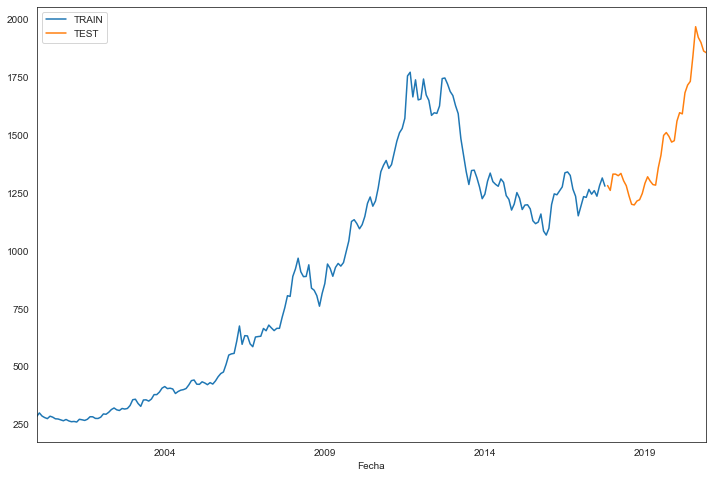

In [57]:
train_ts.plot(legend=True,label='TRAIN')
test_ts.plot(legend=True,label='TEST',figsize=(12,8));

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
print(ts)

Fecha
2000-01-01     284.3
2000-02-01     299.9
2000-03-01     286.4
2000-04-01     279.7
2000-05-01     275.2
               ...  
2020-08-01    1968.6
2020-09-01    1922.2
2020-10-01    1900.3
2020-11-01    1863.5
2020-12-01    1856.0
Freq: MS, Name: USdollar, Length: 252, dtype: float64


<AxesSubplot:>

Text(0, 0.5, 'Gold_price')

<AxesSubplot:>

Text(0, 0.5, 'level')

<AxesSubplot:>

Text(0, 0.5, 'trend')

<AxesSubplot:>

Text(0, 0.5, 'residual')

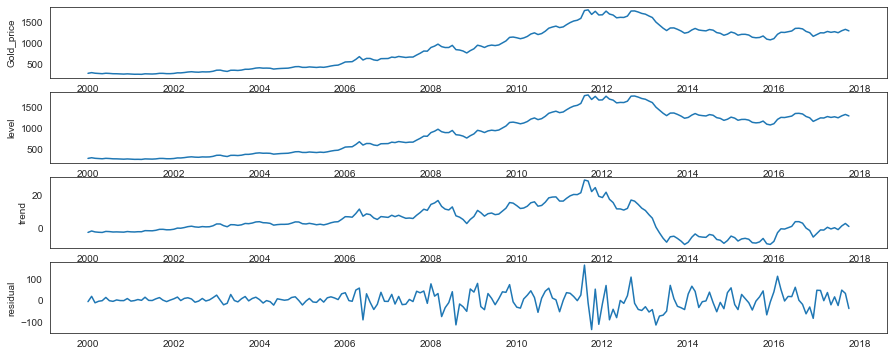

In [59]:
#print(pd.infer_freq(data['Month'], warn=True))
fit1 = ExponentialSmoothing(train_ts, seasonal_periods=12, 
                            trend='add',# seasonal='add',
                            initialization_method="estimated"
                            ,use_boxcox=False).fit()
####ejecutar desde la línea 74 hasta la 88
plt.subplot(4, 1, 1)
plt.plot(train_ts)
plt.ylabel('Gold_price') 
plt.subplot(4, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level') 
plt.subplot(4, 1, 3)
plt.plot(fit1.trend)
plt.ylabel('trend') 
plt.subplot(4, 1, 4)
plt.plot(fit1.resid)
plt.ylabel('residual')

In [60]:
fit1.params_formatted

name       param  optimized
smoothing_level  alpha    0.995000       True
smoothing_trend   beta    0.047381       True
initial_level      l.0  292.946667       True
initial_trend      b.0   -2.153939       True

<AxesSubplot:xlabel='Fecha'>

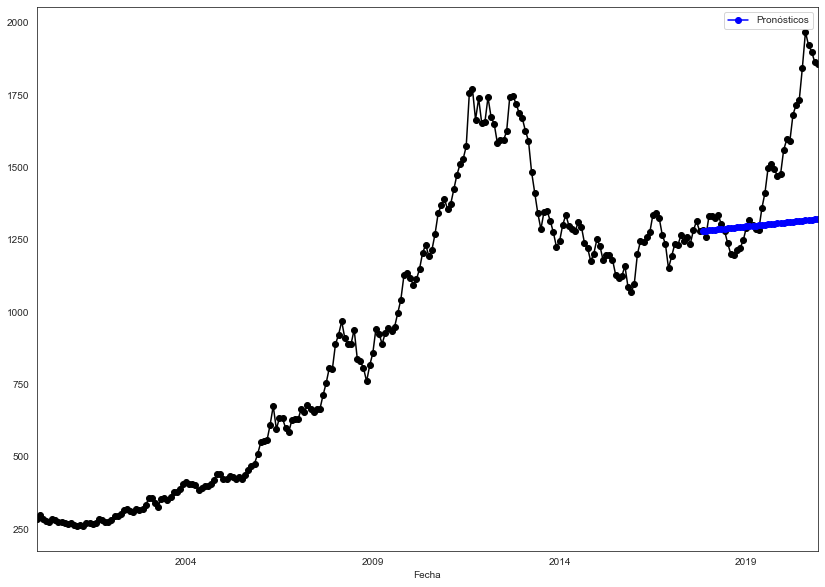

In [61]:
fcast1 = fit1.forecast(38).rename("Pronósticos")
ax = ts.plot(color="Black", marker="o", figsize=(14,10),legend=False)
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)

<AxesSubplot:xlabel='Fecha'>

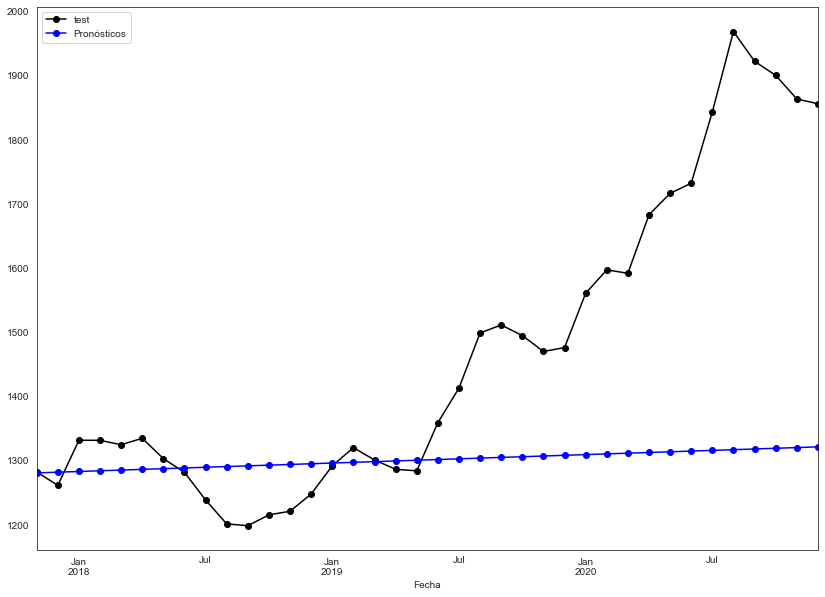

In [62]:
fcast1 = fit1.forecast(38).rename("Pronósticos")
ax = test_ts.plot(color="Black", marker="o", figsize=(14,10),legend=True, label='test')
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)

In [64]:
from sklearn.metrics import mean_squared_error
ms_error_SE = (mean_squared_error(test_ts,fcast1))
ms_error_SE

76677.96373382669

Text(0, 0.5, 'Número de Pasajeros de una Aerolínea(en miles)')

Text(0.5, 0, 'Year')

<AxesSubplot:title={'center':"Pronósticos y Simulaciones del método aditivo Holt-Winters'"}, xlabel='Fecha', ylabel='Número de Pasajeros de una Aerolínea(en miles)'>

<AxesSubplot:title={'center':"Pronósticos y Simulaciones del método aditivo Holt-Winters'"}, xlabel='Fecha', ylabel='Número de Pasajeros de una Aerolínea(en miles)'>

<AxesSubplot:title={'center':"Pronósticos y Simulaciones del método aditivo Holt-Winters'"}, xlabel='Fecha', ylabel='Número de Pasajeros de una Aerolínea(en miles)'>

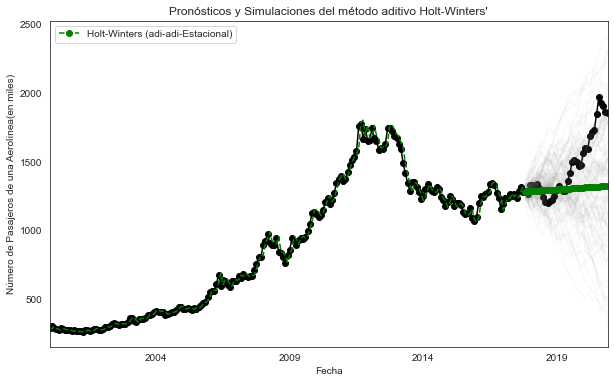

In [66]:
fit_sim = ExponentialSmoothing(train_ts, trend='add', 
                               initialization_method="estimated",use_boxcox=False).fit()
simulations = fit_sim.simulate(38, repetitions=100, error='add')

ax = ts.plot(figsize=(10,6), marker='o', color='black',
               title="Pronósticos y Simulaciones del método aditivo Holt-Winters'" )
ax.set_ylabel("Número de Pasajeros de una Aerolínea(en miles)")
ax.set_xlabel("Year")
fit_sim.fittedvalues.plot(ax=ax, style='--', color='green')
simulations.plot(ax=ax, style='-', alpha=0.05, color='grey', legend=False)
fit_sim.forecast(38).rename('Holt-Winters (adi-adi-Estacional)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()

In [67]:
ms_error_HW = (mean_squared_error(test_ts,fit_sim.forecast(38)))
ms_error_HW

76677.96373382669

## Arboles de decision


In [68]:
np.random.seed(1)

In [69]:
from matplotlib import pyplot

In [70]:
PrecioOro

USdollar
Fecha               
2000-01-01     284.3
2000-02-01     299.9
2000-03-01     286.4
2000-04-01     279.7
2000-05-01     275.2
...              ...
2020-08-01    1968.6
2020-09-01    1922.2
2020-10-01    1900.3
2020-11-01    1863.5
2020-12-01    1856.0

[252 rows x 1 columns]

In [71]:
ts.head(10)
type(ts)

Fecha
2000-01-01    284.3
2000-02-01    299.9
2000-03-01    286.4
2000-04-01    279.7
2000-05-01    275.2
2000-06-01    285.7
2000-07-01    281.6
2000-08-01    274.5
2000-09-01    273.7
2000-10-01    270.0
Freq: MS, Name: USdollar, dtype: float64

pandas.core.series.Series

<AxesSubplot:xlabel='Fecha'>

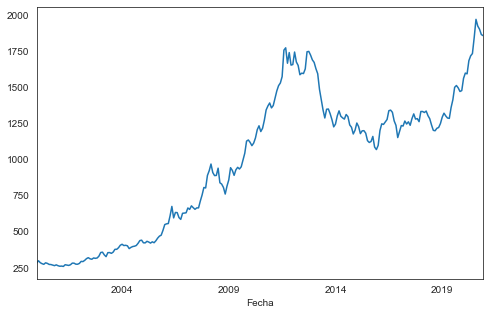

In [72]:
ts.plot(figsize=(8,5))
pyplot.show()

### Graficos de autocorrelacion

In [73]:
dif_ts.head(10)

Fecha
2000-01-01     NaN
2000-02-01    15.6
2000-03-01   -13.5
2000-04-01    -6.7
2000-05-01    -4.5
2000-06-01    10.5
2000-07-01    -4.1
2000-08-01    -7.1
2000-09-01    -0.8
2000-10-01    -3.7
Freq: MS, Name: USdollar, dtype: float64

In [74]:
dif_ts=dif_ts[1:]
dif_ts.head(10)

Fecha
2000-02-01    15.6
2000-03-01   -13.5
2000-04-01    -6.7
2000-05-01    -4.5
2000-06-01    10.5
2000-07-01    -4.1
2000-08-01    -7.1
2000-09-01    -0.8
2000-10-01    -3.7
2000-11-01    -4.0
Freq: MS, Name: USdollar, dtype: float64

Text(0.5, 0, 'Indice')

Text(0, 0.5, 'precio del oro')

Text(0.5, 1.0, 'Serie de tiempo diferenciada (orden 1) sobre el precio del oro')

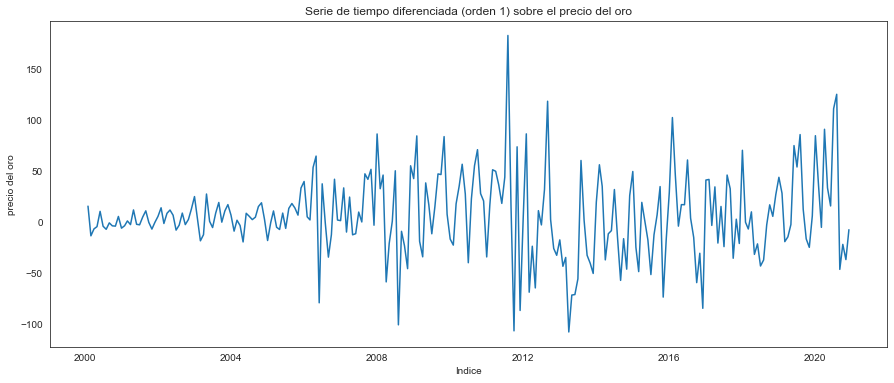

In [75]:
g = plt.plot(dif_ts)
plt.xlabel('Indice') 
plt.ylabel('precio del oro') 
plt.title(label='Serie de tiempo diferenciada (orden 1) sobre el precio del oro') 


In [76]:
from math import sqrt

max(len(dif_ts)/4, sqrt(len(dif_ts)))

62.75

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


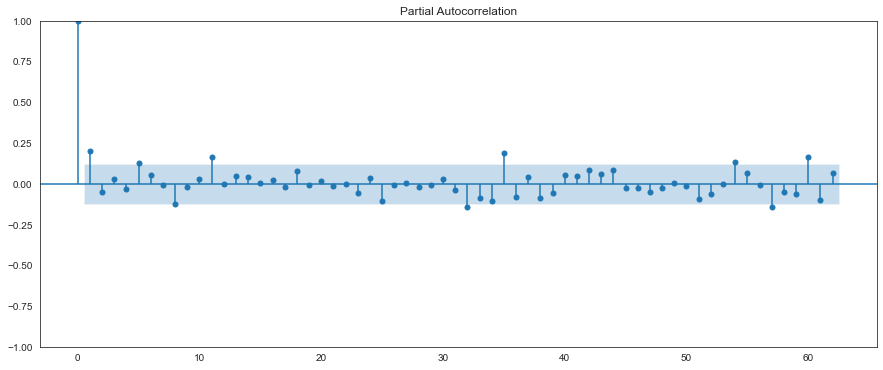

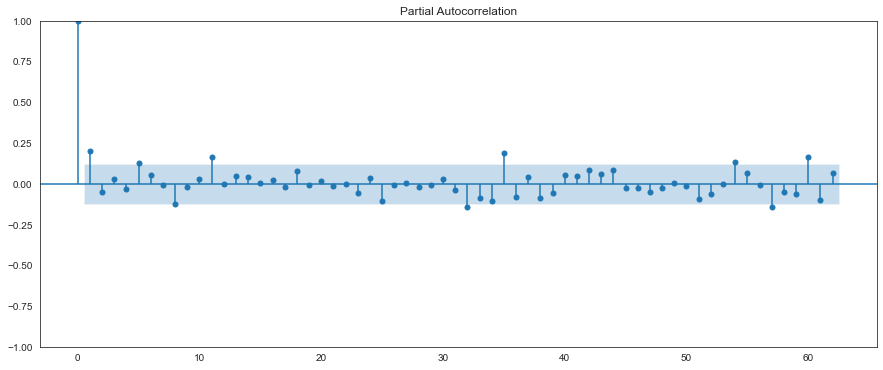

In [77]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

sm.graphics.tsa.plot_pacf(dif_ts, lags=(len(dif_ts)/4))


## Creacion de las variables rezagadas

In [78]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [79]:
for i in range(11,0,-1):
    df1[['t-'+str(i)]] = PrecioOro.shift(i)
print(df1)

              t-11    t-10     t-9     t-8     t-7     t-6     t-5     t-4  \
Fecha                                                                        
2000-01-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2000-02-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2000-03-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2000-04-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2000-05-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN   284.3   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2020-08-01  1511.3  1494.8  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9   
2020-09-01  1494.8  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4   
2020-10-01  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2   
2020-11-01  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2  1843.3   
2020-12-01  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2  1843

In [80]:
# Create column t
df1['t'] = PrecioOro.values
print(df1.head(12))

             t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3  \
Fecha                                                                       
2000-01-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2000-02-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2000-03-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2000-04-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  284.3   
2000-05-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN  284.3  299.9   
2000-06-01    NaN    NaN    NaN    NaN    NaN    NaN  284.3  299.9  286.4   
2000-07-01    NaN    NaN    NaN    NaN    NaN  284.3  299.9  286.4  279.7   
2000-08-01    NaN    NaN    NaN    NaN  284.3  299.9  286.4  279.7  275.2   
2000-09-01    NaN    NaN    NaN  284.3  299.9  286.4  279.7  275.2  285.7   
2000-10-01    NaN    NaN  284.3  299.9  286.4  279.7  275.2  285.7  281.6   
2000-11-01    NaN  284.3  299.9  286.4  279.7  275.2  285.7  281.6  274.5   

In [81]:
# Create a new subsetted dataframe, removing Nans from first 370 rows
df1_Gold = df1[11:]
print(df1_Gold)
df1_Gold.size

              t-11    t-10     t-9     t-8     t-7     t-6     t-5     t-4  \
Fecha                                                                        
2000-12-01   284.3   299.9   286.4   279.7   275.2   285.7   281.6   274.5   
2001-01-01   299.9   286.4   279.7   275.2   285.7   281.6   274.5   273.7   
2001-02-01   286.4   279.7   275.2   285.7   281.6   274.5   273.7   270.0   
2001-03-01   279.7   275.2   285.7   281.6   274.5   273.7   270.0   266.0   
2001-04-01   275.2   285.7   281.6   274.5   273.7   270.0   266.0   271.5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2020-08-01  1511.3  1494.8  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9   
2020-09-01  1494.8  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4   
2020-10-01  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2   
2020-11-01  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2  1843.3   
2020-12-01  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2  1843

2892

## Division de los datos

In [82]:
# Split data

Goldsplit = df1_Gold.values
# split into lagged variables and original time series
X1= Goldsplit[:, 0:-1]  #valores de las serie en los 12 rezagos en el tiempo t
y1 =Goldsplit[:,-1]  # valores de la serie en el tiempo t

In [83]:
df1_Gold

t-11    t-10     t-9     t-8     t-7     t-6     t-5     t-4  \
Fecha                                                                        
2000-12-01   284.3   299.9   286.4   279.7   275.2   285.7   281.6   274.5   
2001-01-01   299.9   286.4   279.7   275.2   285.7   281.6   274.5   273.7   
2001-02-01   286.4   279.7   275.2   285.7   281.6   274.5   273.7   270.0   
2001-03-01   279.7   275.2   285.7   281.6   274.5   273.7   270.0   266.0   
2001-04-01   275.2   285.7   281.6   274.5   273.7   270.0   266.0   271.5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2020-08-01  1511.3  1494.8  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9   
2020-09-01  1494.8  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4   
2020-10-01  1470.0  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2   
2020-11-01  1476.0  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2  1843.3   
2020-12-01  1560.7  1597.1  1591.9  1682.9  1716.4  1732.2  1843.3  1968.6   

               t-3     t-2     t-1       t  
Fecha                                       
2000-12-01   273.7   270.0   266.0   271.5  
2001-01-01   270.0   266.0   271.5   265.5  
2001-02-01   266.0   271.5   265.5   261.9  
2001-03-01   271.5   265.5   261.9   263.0  
2001-04-01   265.5   261.9   263.0   260.5  
...            ...     ...     ...     ...  
2020-08-01  1716.4  1732.2  1843.3  1968.6  
2020-09-01  1732.2  1843.3  1968.6  1922.2  
2020-10-01  1843.3  1968.6  1922.2  1900.3  
2020-11-01  1968.6  1922.2  1900.3  1863.5  
2020-12-01  1922.2  1900.3  1863.5  1856.0  

[241 rows x 12 columns]

In [84]:
print(y1)

[ 271.5  265.5  261.9  263.   260.5  272.4  270.2  267.5  272.4  283.4
  283.1  276.2  275.9  281.5  295.5  294.1  302.7  314.5  321.2  313.3
  310.3  319.1  316.6  319.1  331.9  356.9  359.   340.6  328.2  355.7
  356.4  351.   359.8  379.   378.9  389.9  407.   413.8  404.9  406.7
  403.3  383.8  392.4  398.1  400.5  405.3  420.5  439.4  442.1  424.
  423.4  434.3  429.2  421.9  430.7  424.5  437.9  456.1  469.9  476.7
  510.1  549.9  555.   557.1  610.7  675.4  596.2  633.7  632.6  598.2
  585.8  627.8  629.8  631.2  664.7  654.9  679.4  666.9  655.5  665.3
  665.4  712.7  754.6  806.3  803.2  889.6  922.3  968.4  909.7  888.7
  889.5  939.8  839.   829.9  806.6  760.9  816.1  858.7  943.2  924.3
  890.2  928.6  945.7  934.2  949.4  996.6 1043.2 1127.  1134.7 1118.
 1095.4 1113.3 1148.7 1205.4 1232.9 1193.  1215.8 1271.  1342.  1369.9
 1390.6 1356.4 1372.7 1424.  1473.8 1510.4 1528.7 1572.8 1755.8 1771.9
 1665.2 1739.  1652.3 1656.1 1742.6 1673.8 1650.1 1585.5 1596.7 1593.9
 1626.  

In [85]:
# Target Train-Test split

Y1 = y1

traintarget_size = int(len(Y1) * 0.85)   # Set split, este porcentaje tan raro es para que coincida con el del ejemplo de R.
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 241
Training Observations for Target: 204
Testing Observations for Target: 37


In [86]:
# Features Train-Test split

trainfeature_size = int(len(X1) * 0.85)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]   ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 241
Training Observations for feature: 204
Testing Observations for feature: 37


In [87]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_Gold = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_Gold.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_Gold.score(train_feature, train_target))
print(decision_tree_Gold.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0



DecisionTreeRegressor()

1.0
0.7718689544545035


In [88]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_Gold = DecisionTreeRegressor(max_depth=d)
    decision_tree_Gold.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_Gold.score(train_feature, train_target))
    print(decision_tree_Gold.score(test_feature, test_target), '\n')  # You want the test score to be positive and high
 


DecisionTreeRegressor(max_depth=2)

max_depth= 2
0.9411461613021407
0.5591364551133613 



DecisionTreeRegressor(max_depth=3)

max_depth= 3
0.982847595204359
0.7491304812799392 



DecisionTreeRegressor(max_depth=4)

max_depth= 4
0.9925353810204458
0.7380713714262422 



DecisionTreeRegressor(max_depth=5)

max_depth= 5
0.9964616111590427
0.7842159723063371 



DecisionTreeRegressor(max_depth=7)

max_depth= 7
0.9992269161756054
0.7737455424036814 



DecisionTreeRegressor(max_depth=8)

max_depth= 8
0.9996651096834236
0.7766151240775596 



DecisionTreeRegressor(max_depth=10)

max_depth= 10
0.9999882863462474
0.7681834475409588 



DecisionTreeRegressor(max_depth=5)

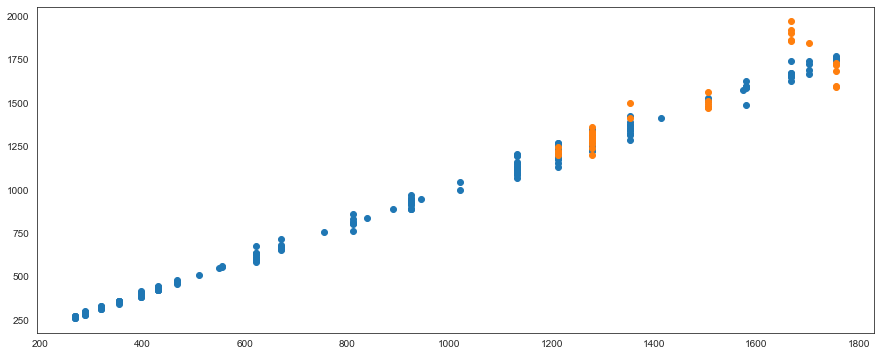

In [89]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_Gold = DecisionTreeRegressor(max_depth=5)  # fill in best max depth here
decision_tree_Gold.fit(train_feature,train_target)

# Predict values for train and test
train_prediction = decision_tree_Gold.predict(train_feature)
test_prediction = decision_tree_Gold.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction,train_target, label='train')  # blue
plt.scatter(test_prediction,test_target, label='test')  # orange
plt.show()

In [90]:
from sklearn import tree

listacaract=list(df1_Gold.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_Gold)
print(text_representation)

|--- feature_10 <= 848.85
|   |--- feature_10 <= 493.40
|   |   |--- feature_2 <= 324.70
|   |   |   |--- feature_8 <= 288.75
|   |   |   |   |--- feature_0 <= 273.05
|   |   |   |   |   |--- value: [286.55]
|   |   |   |   |--- feature_0 >  273.05
|   |   |   |   |   |--- value: [267.21]
|   |   |   |--- feature_8 >  288.75
|   |   |   |   |--- feature_3 <= 311.80
|   |   |   |   |   |--- value: [319.36]
|   |   |   |   |--- feature_3 >  311.80
|   |   |   |   |   |--- value: [354.20]
|   |   |--- feature_2 >  324.70
|   |   |   |--- feature_0 <= 417.15
|   |   |   |   |--- feature_0 <= 381.40
|   |   |   |   |   |--- value: [397.20]
|   |   |   |   |--- feature_0 >  381.40
|   |   |   |   |   |--- value: [429.81]
|   |   |   |--- feature_0 >  417.15
|   |   |   |   |--- feature_1 <= 423.70
|   |   |   |   |   |--- value: [510.10]
|   |   |   |   |--- feature_1 >  423.70
|   |   |   |   |   |--- value: [467.57]
|   |--- feature_10 >  493.40
|   |   |--- feature_10 <= 696.05
|   |   | 

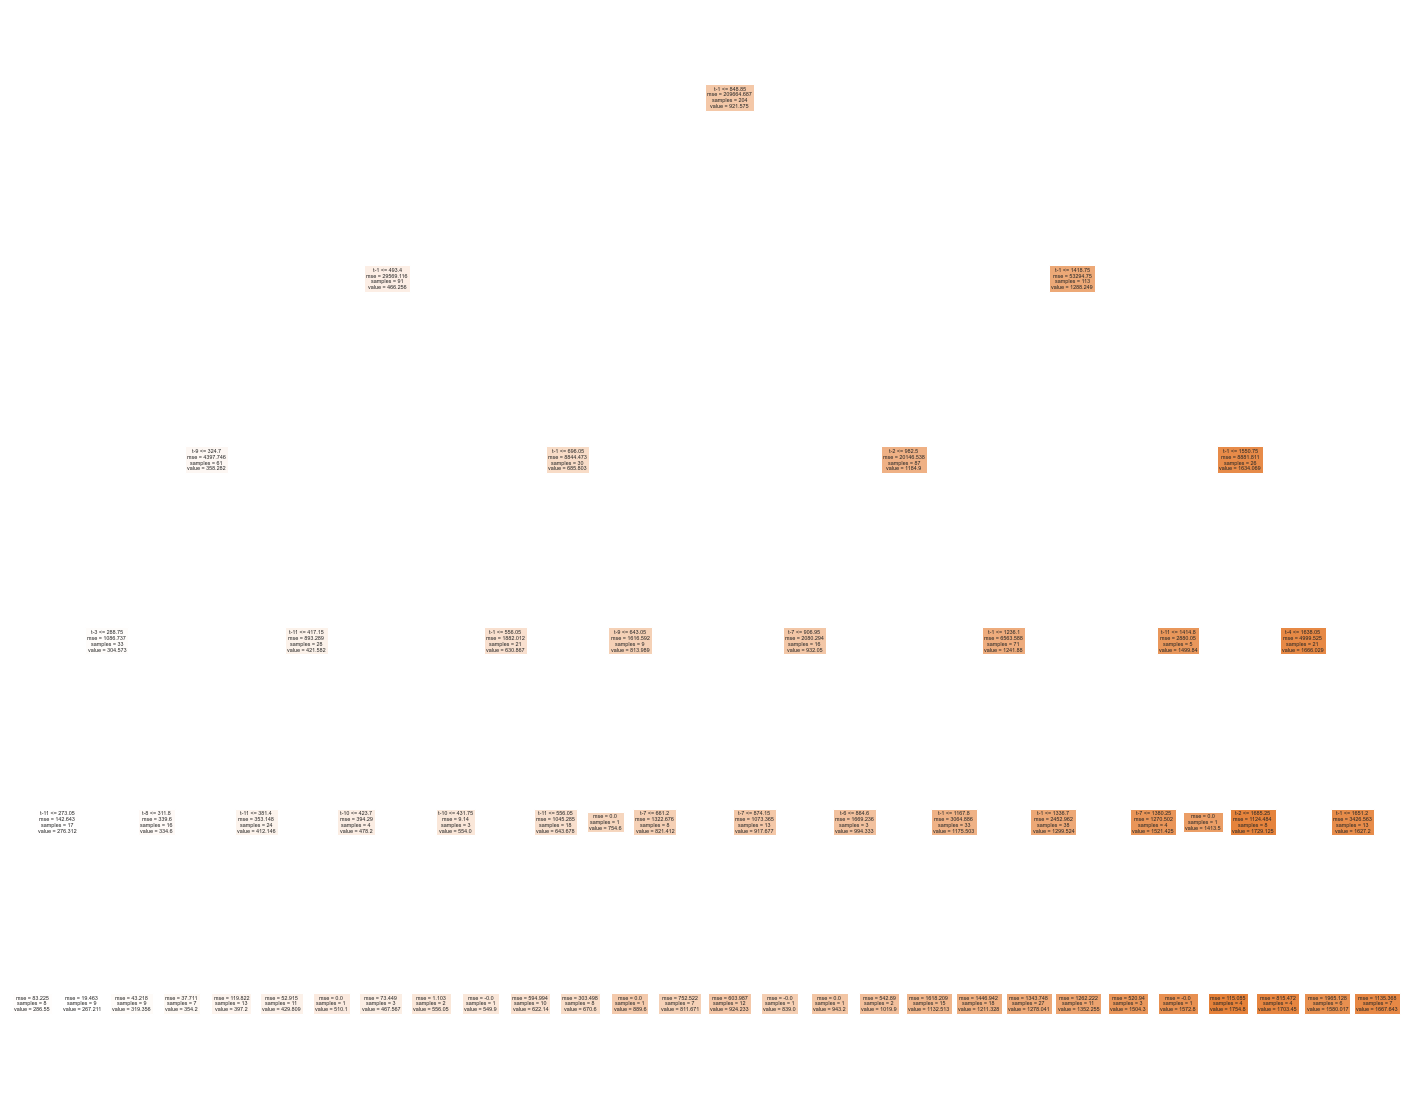

In [91]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_Gold, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)

In [92]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

204
204
37
37


In [93]:
indicetrian_test=df1_Gold.index
print(indicetrian_test.size)  ###Tamaño del índice


241


In [94]:
indicetrain=indicetrian_test[0:204]
indicetest=indicetrian_test[204:241]

In [95]:
targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

241
241


In [96]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred

observado   Predicción
Fecha                             
2000-12-01      271.5   267.211111
2001-01-01      265.5   267.211111
2001-02-01      261.9   267.211111
2001-03-01      263.0   267.211111
2001-04-01      260.5   267.211111
...               ...          ...
2020-08-01     1968.6  1667.642857
2020-09-01     1922.2  1667.642857
2020-10-01     1900.3  1667.642857
2020-11-01     1863.5  1667.642857
2020-12-01     1856.0  1667.642857

[241 rows x 2 columns]

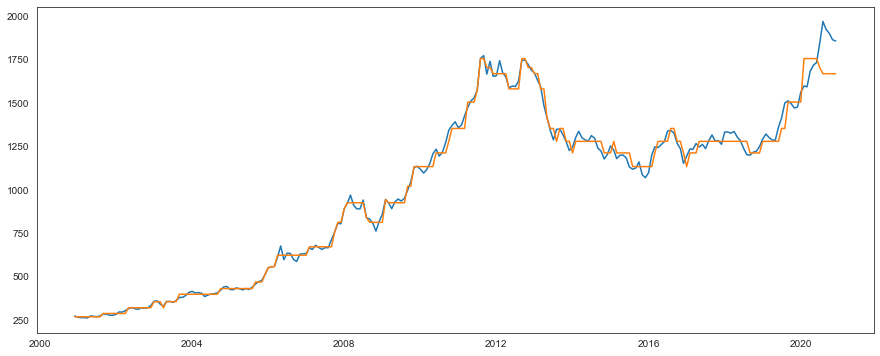

In [97]:
plt.plot(ObsvsPred)


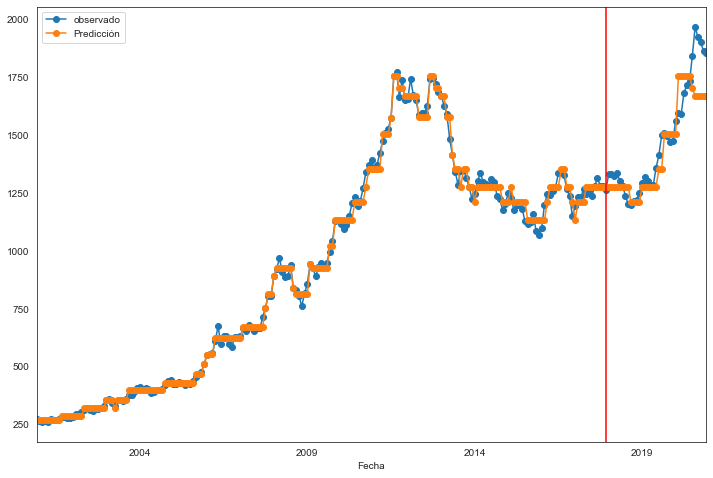

In [98]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_test[204].date(),color='red')

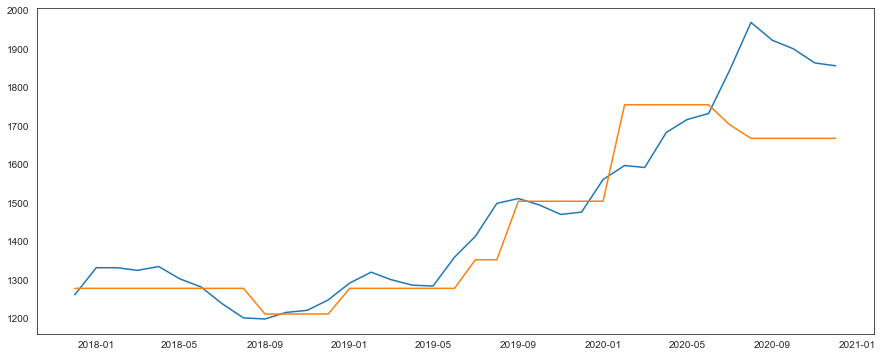

In [99]:
plt.plot(ObsvsPred[204:241])


In [100]:
ObsvsPred[204:241]
len(ObsvsPred[204:241])

observado   Predicción
Fecha                             
2017-12-01     1261.3  1278.040741
2018-01-01     1331.7  1278.040741
2018-02-01     1331.5  1278.040741
2018-03-01     1324.7  1278.040741
2018-04-01     1334.7  1278.040741
2018-05-01     1303.0  1278.040741
2018-06-01     1281.6  1278.040741
2018-07-01     1238.5  1278.040741
2018-08-01     1201.3  1278.040741
2018-09-01     1198.5  1211.327778
2018-10-01     1215.4  1211.327778
2018-11-01     1221.0  1211.327778
2018-12-01     1247.9  1211.327778
2019-01-01     1291.8  1278.040741
2019-02-01     1320.1  1278.040741
2019-03-01     1300.9  1278.040741
2019-04-01     1286.4  1278.040741
2019-05-01     1284.0  1278.040741
2019-06-01     1359.0  1278.040741
2019-07-01     1413.0  1352.254545
2019-08-01     1498.8  1352.254545
2019-09-01     1511.3  1504.300000
2019-10-01     1494.8  1504.300000
2019-11-01     1470.0  1504.300000
2019-12-01     1476.0  1504.300000
2020-01-01     1560.7  1504.300000
2020-02-01     1597.1  1754.800000
2020-03-01     1591.9  1754.800000
2020-04-01     1682.9  1754.800000
2020-05-01     1716.4  1754.800000
2020-06-01     1732.2  1754.800000
2020-07-01     1843.3  1703.450000
2020-08-01     1968.6  1667.642857
2020-09-01     1922.2  1667.642857
2020-10-01     1900.3  1667.642857
2020-11-01     1863.5  1667.642857
2020-12-01     1856.0  1667.642857

37

In [101]:
test_data = ObsvsPred['observado'][204:241]
test_predictions = ObsvsPred['Predicción'][204:241]

In [102]:
from sklearn.metrics import mean_squared_error

ms_error_AD = (mean_squared_error(test_data,test_predictions))
ms_error_AD

11410.001544519131

# Redes Neuronales

In [103]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy as sp

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


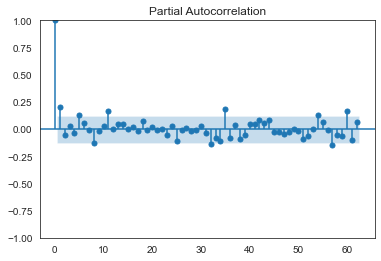

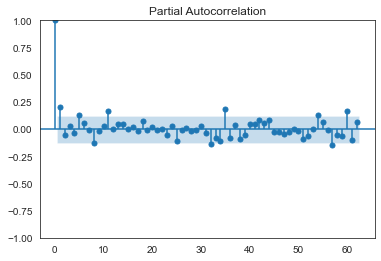

In [104]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

sm.graphics.tsa.plot_pacf(dif_ts, lags=(len(dif_ts)/4))

1
0.003968253968253968
252.0


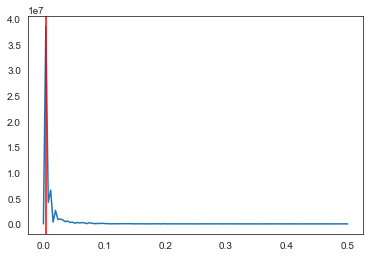

In [105]:
f, Pxx_den=sp.signal.periodogram(PrecioOro['USdollar'])
plt.plot(f, Pxx_den)
plt.axvline(x=1/252,color='red')
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)
print(1/frecuencia_max)

## Creación de variables rezagadas

# Dividir los datos en repuestas y Covariables, entrenamiento, validación y prueba.

In [106]:
print(train_feature.shape) # X
print(train_target.shape)  # Y

 
print(test_feature.shape) # X
print(test_target.shape)  # Y

(204, 11)
(204,)
(37, 11)
(37,)


In [107]:
X_train_full = train_feature 
X_test = test_feature

y_train_full = train_target
y_test = test_target

In [108]:
print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_test.shape)

(204, 11)
(37, 11)
(204,)
(37,)


In [109]:
from sklearn.model_selection import train_test_split

recordamos, que ya habaiamos dividido nuestro cinjunto de datos en entrenamiento (85%) y prueba (15%). Luego dividiremos nuestro conjunto de datos en entrenamiento(88.24%) y prueba(11.76%), luego el entrenamiento será dividido en entrenamiento(88% del 85%) y validación(11% del 85%) es decir la divisiones quedaron 85%/10%/15%.

In [110]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,
                                                y_train_full,
                                                test_size=0.1176, 
                                                train_size=0.8824,
                                                shuffle=False)

In [111]:
len(y_val)
len(y_test)
len(y_train)

24

37

180

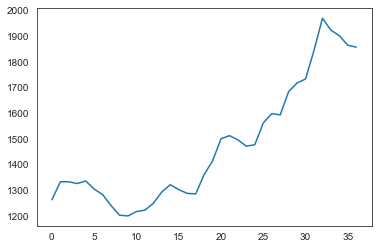

In [112]:
plt.plot(y_test)

## Red Neuronal Multicapa 1

In [113]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [242]:
np.random.seed(29)
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(128,activation="linear")(input_layer)
hidden2 = keras.layers.Dense(64,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(64,activation="linear")(hidden2)
hidden4 = keras.layers.Dense(32,activation="linear")(hidden3)
dropout_layer = keras.layers.Dropout(0.2)(hidden4)
output_layer = keras.layers.Dense(1, activation='linear')(dropout_layer)

In [243]:
model1=keras.Model(inputs=[input_layer],outputs=[output_layer])
model1.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 11)]              0         
                                                                 
 dense_140 (Dense)           (None, 128)               1536      
                                                                 
 dense_141 (Dense)           (None, 64)                8256      
                                                                 
 dense_142 (Dense)           (None, 64)                4160      
                                                                 
 dense_143 (Dense)           (None, 32)                2080      
                                                                 
 dropout_106 (Dropout)       (None, 32)                0         
                                                                 
 dense_144 (Dense)           (None, 1)                 33 

In [249]:
np.random.seed(2022)
model1.compile(loss="mean_squared_error",optimizer="adam")
history1=model1.fit(X_train,y_train,epochs=200,validation_data=(X_val,y_val))

Epoch 1/200
6/6 [==============================] - 3s 163ms/step - loss: 36727.4727 - val_loss: 5749.7476
Epoch 2/200
6/6 [==============================] - 0s 16ms/step - loss: 28271.2910 - val_loss: 6720.0103
Epoch 3/200
6/6 [==============================] - 0s 24ms/step - loss: 13492.3330 - val_loss: 3104.8203
Epoch 4/200
6/6 [==============================] - 0s 23ms/step - loss: 17177.8730 - val_loss: 5269.6812
Epoch 5/200
6/6 [==============================] - 0s 20ms/step - loss: 12586.7051 - val_loss: 3698.8108
Epoch 6/200
6/6 [==============================] - 0s 23ms/step - loss: 14117.1982 - val_loss: 2630.8406
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 11436.9170 - val_loss: 4081.3105
Epoch 8/200
6/6 [==============================] - 0s 18ms/step - loss: 9987.5732 - val_loss: 7738.2305
Epoch 9/200
6/6 [==============================] - 0s 20ms/step - loss: 11599.2891 - val_loss: 2664.4094
Epoch 10/200
6/6 [==============================] - 0s 

<AxesSubplot:>

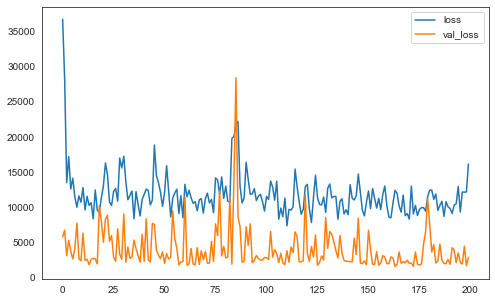

In [250]:
pd.DataFrame(history1.history).plot(figsize=(8,5))

### Error cuadratico medio

In [251]:
mse_test_RN1=model1.evaluate(X_test,y_test)
print(mse_test_RN1)

2/2 [==============================] - 0s 6ms/step - loss: 3244.4766
3244.4765625


### prediccion

In [252]:
preds_model1=model1.predict(X_test)
ypred1=model1.predict(X_test)

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Gold Price')

Text(0, 0.5, 'Gold Price')

Text(0.5, 0, 'Index')

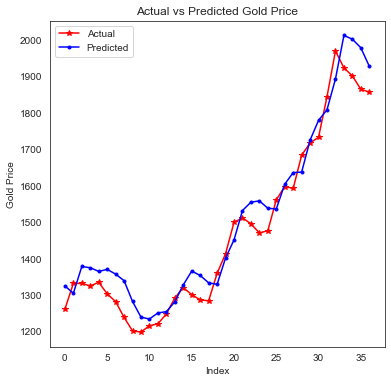

In [253]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(preds_model1.size), preds_model1, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Gold Price')
plt.ylabel('Gold Price')
plt.xlabel('Index')

## Red Neuronal multicapa 2

In [121]:
np.random.seed(29)
# Define layers
model2 = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dropout(0.1),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam()

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [122]:
np.random.seed(2022)
model2.compile(loss="mean_squared_error",optimizer="adam")
history2=model2.fit(X_train,y_train,epochs=200,validation_data=(X_val,y_val))

Epoch 1/200
6/6 [==============================] - 1s 74ms/step - loss: 722772.8750 - val_loss: 184127.9531
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 56280.8203 - val_loss: 61893.6758
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 93430.6406 - val_loss: 120333.4922
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 74587.5078 - val_loss: 22323.8496
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 27150.4277 - val_loss: 14859.0547
Epoch 6/200
6/6 [==============================] - 0s 15ms/step - loss: 33978.1602 - val_loss: 25761.9062
Epoch 7/200
6/6 [==============================] - 0s 14ms/step - loss: 34807.6484 - val_loss: 8124.6313
Epoch 8/200
6/6 [==============================] - 0s 13ms/step - loss: 21557.7949 - val_loss: 7497.0156
Epoch 9/200
6/6 [==============================] - 0s 13ms/step - loss: 23556.5605 - val_loss: 7769.6880
Epoch 10/200
6/6 [============================

<AxesSubplot:>

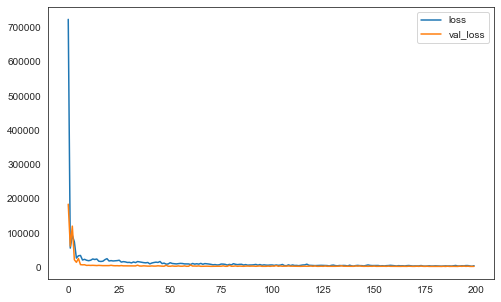

In [123]:
pd.DataFrame(history2.history).plot(figsize=(8,5))

### Error cuadratico medio

In [124]:
mse_test_RN2=model2.evaluate(X_test,y_test)
print(mse_test_RN2)

2/2 [==============================] - 0s 9ms/step - loss: 3380.4121
3380.412109375


### Prediccion segunda red neuronal

In [125]:
preds_model2=model2.predict(X_test)

In [126]:
ypred2=model2.predict(X_test)

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Gold Price')

Text(0, 0.5, 'Gold Price')

Text(0.5, 0, 'Index')

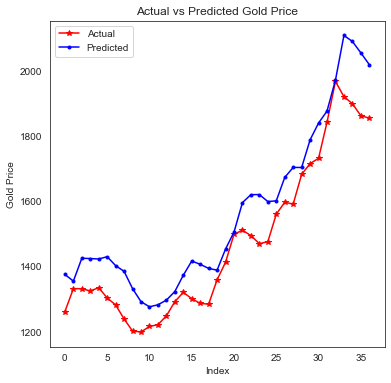

In [127]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(preds_model2.size), preds_model1, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Gold Price')
plt.ylabel('Gold Price')
plt.xlabel('Index')

# Red Neuronal con hiperparametros encontrados por algortimo

In [128]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [129]:
len(y_test)

len(X_train)
len(X_val)
len(y_train)
len(y_val)

37

180

24

180

24

In [130]:
len(y_val)
len(y_test)
len(y_train)

24

37

180

In [131]:
22+37+182

241

In [132]:
(100/241)*37

15.352697095435685

In [133]:
X_train_scaled = X_train
X_test_scaled = y_train

In [134]:
print(X_val)

[[1251.9 1227.2 1178.6 1197.9 1199.1 1181.5 1130.  1117.5 1124.5 1159.3
  1085.7]
 [1227.2 1178.6 1197.9 1199.1 1181.5 1130.  1117.5 1124.5 1159.3 1085.7
  1068.3]
 [1178.6 1197.9 1199.1 1181.5 1130.  1117.5 1124.5 1159.3 1085.7 1068.3
  1097.4]
 [1197.9 1199.1 1181.5 1130.  1117.5 1124.5 1159.3 1085.7 1068.3 1097.4
  1199.9]
 [1199.1 1181.5 1130.  1117.5 1124.5 1159.3 1085.7 1068.3 1097.4 1199.9
  1246.3]
 [1181.5 1130.  1117.5 1124.5 1159.3 1085.7 1068.3 1097.4 1199.9 1246.3
  1242.3]
 [1130.  1117.5 1124.5 1159.3 1085.7 1068.3 1097.4 1199.9 1246.3 1242.3
  1259.4]
 [1117.5 1124.5 1159.3 1085.7 1068.3 1097.4 1199.9 1246.3 1242.3 1259.4
  1276.4]
 [1124.5 1159.3 1085.7 1068.3 1097.4 1199.9 1246.3 1242.3 1259.4 1276.4
  1337.3]
 [1159.3 1085.7 1068.3 1097.4 1199.9 1246.3 1242.3 1259.4 1276.4 1337.3
  1341.1]
 [1085.7 1068.3 1097.4 1199.9 1246.3 1242.3 1259.4 1276.4 1337.3 1341.1
  1326. ]
 [1068.3 1097.4 1199.9 1246.3 1242.3 1259.4 1276.4 1337.3 1341.1 1326.
  1266.6]
 [1097.4 1199.9 1

## Defining the Objective for Optimization

In [135]:
# Esto devuelve un modelo de perceptrón multicapa en Keras.
def get_keras_model(num_hidden_layers, 
                    num_neurons_per_layer, 
                    dropout_rate, 
                    activation):
    # crear el modelo MLP.
    
    # definir las capas.
    inputs = tf.keras.Input(shape=(X_train_scaled.shape[1],))  # input layer.
    x = layers.Dropout(dropout_rate)(inputs) # dropout on the weights.
    
    # Añadir las capas ocultas.
    for i in range(num_hidden_layers):
        x = layers.Dense(num_neurons_per_layer, 
                         activation=activation)(x)
        x = layers.Dropout(dropout_rate)(x)
    
    # capa de salida.
    outputs = layers.Dense(1, activation='linear')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model
    

# Esta función toma los hiperparámetros y devuelve una puntuación (validación cruzada).
def keras_mlp_cv_score(parameterization, weight=None):
    
    model = get_keras_model(parameterization.get('num_hidden_layers'),
                            parameterization.get('neurons_per_layer'),
                            parameterization.get('dropout_rate'),
                            parameterization.get('activation'))
    
    opt = parameterization.get('optimizer')
    opt = opt.lower()
    
    learning_rate = parameterization.get('learning_rate')
    
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    NUM_EPOCHS = 100
    
    # Especificacion de la configuración de entrenamiento.
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['mse'])

    data = X_train_scaled
    labels = y_train
    
    # ajustar el modelo utilizando validation_data=(X_val,y_val) conjunto de validación.
    res = model.fit(data, labels, epochs=NUM_EPOCHS, batch_size=parameterization.get('batch_size'),
                    validation_data=(X_val,y_val))
    
    # mira las últimas 10 Epochs. Obtenga la media y la desviación estándar de la puntuación de validación.
    last10_scores = np.array(res.history['val_loss'][-10:])
    mean = last10_scores.mean()
    sem = last10_scores.std()
    
    # Si el modelo no converge, entonces establece una pérdida alta.
    if np.isnan(mean):
        return 9999.0, 0.0
    
    return mean, sem

In [136]:
# Define the search space.
parameters=[
    {
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.001, 0.002],
        "log_scale": True,
    },
    {
        "name": "dropout_rate",
        "type": "range",
        "bounds": [0.01, 0.02],
        "log_scale": True,
    },
    {
        "name": "num_hidden_layers",
        "type": "range",
        "bounds": [1, 5],
        "value_type": "int"
    },
    {
        "name": "neurons_per_layer",
        "type": "choice",
        "values": [1, 2, 4, 8, 16, 32, 64, 128],
    },
    
    {
        "name": "batch_size",
        "type": "choice",
        "values": [8, 16, 32, 64, 128],
    },
    
    {
        "name": "activation",
        "type": "choice",
        "values": ['tanh', 'sigmoid', 'relu', 'linear'],
    },
    {
        "name": "optimizer",
        "type": "choice",
        "values": ['adam', 'rms'],
    },
]

## Optimización/ajuste de los hiperparámetros

In [137]:
# import more packages
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

init_notebook_plotting()

ax_client = AxClient()

# creacion el experimento.
ax_client.create_experiment(
    name="keras_experiment",
    parameters=parameters,
    objective_name='keras_cv',
    minimize=True)

def evaluate(parameters):
    return {"keras_cv": keras_mlp_cv_score(parameters)}

[INFO 02-07 13:12:51] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


[INFO 02-07 13:12:51] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 02-07 13:12:51] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 13:12:51] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dropout_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 13:12:51] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter neurons_per_layer. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
C:

In [138]:
for i in range(25):
    parameters, trial_index = ax_client.get_next_trial()
    ax_client.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters))

[INFO 02-07 13:12:53] ax.service.ax_client: Generated new trial 0 with parameters {'learning_rate': 0.001658, 'dropout_rate': 0.014507, 'num_hidden_layers': 4, 'neurons_per_layer': 64, 'batch_size': 16, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/100
12/12 [==============================] - 3s 49ms/step - loss: 990047.7500 - mse: 990047.7500 - val_loss: 1545758.5000 - val_mse: 1545758.5000
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 985860.6875 - mse: 985860.6875 - val_loss: 1540124.1250 - val_mse: 1540124.1250
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 982273.1250 - mse: 982273.1250 - val_loss: 1535967.1250 - val_mse: 1535967.1250
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 979681.1250 - mse: 979681.1250 - val_loss: 1533064.3750 - val_mse: 1533064.3750
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 977780.0625 - mse: 977780.0625 - val_loss: 1530422.3750 - val_mse: 1530422.3750
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 976002.1250 - mse: 976002.1250 - val_loss: 1527892.0000 - val_mse: 1527892.0000
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 974224.6

[INFO 02-07 13:13:08] ax.service.ax_client: Completed trial 0 with data: {'keras_cv': (1331082.4875, 5854.617504)}.
[INFO 02-07 13:13:08] ax.service.ax_client: Generated new trial 1 with parameters {'learning_rate': 0.001316, 'dropout_rate': 0.015137, 'num_hidden_layers': 4, 'neurons_per_layer': 16, 'batch_size': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/100
3/3 [==============================] - 2s 229ms/step - loss: 993488.3750 - mse: 993488.3750 - val_loss: 1554038.8750 - val_mse: 1554038.8750
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 993334.3750 - mse: 993334.3750 - val_loss: 1553820.3750 - val_mse: 1553820.3750
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 993179.1875 - mse: 993179.1875 - val_loss: 1553602.5000 - val_mse: 1553602.5000
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 993013.6875 - mse: 993013.6875 - val_loss: 1553383.6250 - val_mse: 1553383.6250
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 992873.4375 - mse: 992873.4375 - val_loss: 1553164.3750 - val_mse: 1553164.3750
Epoch 6/100
3/3 [==============================] - 0s 36ms/step - loss: 992725.3125 - mse: 992725.3125 - val_loss: 1552941.6250 - val_mse: 1552941.6250
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 992554.2500 - m

[INFO 02-07 13:13:19] ax.service.ax_client: Completed trial 1 with data: {'keras_cv': (1538368.7, 377.27435)}.
[INFO 02-07 13:13:19] ax.service.ax_client: Generated new trial 2 with parameters {'learning_rate': 0.001372, 'dropout_rate': 0.011174, 'num_hidden_layers': 1, 'neurons_per_layer': 32, 'batch_size': 8, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/100
23/23 [==============================] - 2s 18ms/step - loss: 280981.9688 - mse: 280981.9688 - val_loss: 11511.5283 - val_mse: 11511.5283
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 24112.0742 - mse: 24112.0742 - val_loss: 18651.2656 - val_mse: 18651.2656
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 19965.0605 - mse: 19965.0605 - val_loss: 12832.4775 - val_mse: 12832.4775
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 21801.2266 - mse: 21801.2266 - val_loss: 6092.1543 - val_mse: 6092.1543
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 17532.7520 - mse: 17532.7520 - val_loss: 3938.2268 - val_mse: 3938.2268
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 11846.7197 - mse: 11846.7197 - val_loss: 9065.2393 - val_mse: 9065.2393
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 14435.1377 - mse: 14435.1377 - val_loss: 8505.82

[INFO 02-07 13:13:37] ax.service.ax_client: Completed trial 2 with data: {'keras_cv': (6169.666968, 3616.770329)}.
[INFO 02-07 13:13:37] ax.service.ax_client: Generated new trial 3 with parameters {'learning_rate': 0.001282, 'dropout_rate': 0.017991, 'num_hidden_layers': 5, 'neurons_per_layer': 4, 'batch_size': 16, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/100
12/12 [==============================] - 3s 36ms/step - loss: 993011.7500 - mse: 993011.7500 - val_loss: 1553502.0000 - val_mse: 1553502.0000
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 992985.0000 - mse: 992985.0000 - val_loss: 1553464.3750 - val_mse: 1553464.3750
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 992958.1250 - mse: 992958.1250 - val_loss: 1553427.0000 - val_mse: 1553427.0000
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 992932.0000 - mse: 992932.0000 - val_loss: 1553388.5000 - val_mse: 1553388.5000
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 992905.0000 - mse: 992905.0000 - val_loss: 1553350.6250 - val_mse: 1553350.6250
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 992878.5625 - mse: 992878.5625 - val_loss: 1553312.6250 - val_mse: 1553312.6250
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 992

[INFO 02-07 13:13:54] ax.service.ax_client: Completed trial 3 with data: {'keras_cv': (1549918.45, 109.447179)}.
[INFO 02-07 13:13:54] ax.service.ax_client: Generated new trial 4 with parameters {'learning_rate': 0.001772, 'dropout_rate': 0.011427, 'num_hidden_layers': 4, 'neurons_per_layer': 4, 'batch_size': 128, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/100
2/2 [==============================] - 2s 348ms/step - loss: 991461.0000 - mse: 991461.0000 - val_loss: 1551195.5000 - val_mse: 1551195.5000
Epoch 2/100
2/2 [==============================] - 0s 52ms/step - loss: 991334.0625 - mse: 991334.0625 - val_loss: 1551014.3750 - val_mse: 1551014.3750
Epoch 3/100
2/2 [==============================] - 0s 63ms/step - loss: 991178.7500 - mse: 991178.7500 - val_loss: 1550838.1250 - val_mse: 1550838.1250
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 991102.7500 - mse: 991102.7500 - val_loss: 1550667.0000 - val_mse: 1550667.0000
Epoch 5/100
2/2 [==============================] - 0s 64ms/step - loss: 990949.1250 - mse: 990949.1250 - val_loss: 1550499.3750 - val_mse: 1550499.3750
Epoch 6/100
2/2 [==============================] - 0s 71ms/step - loss: 990788.0625 - mse: 990788.0625 - val_loss: 1550335.3750 - val_mse: 1550335.3750
Epoch 7/100
2/2 [==============================] - 0s 76ms/step - loss: 990724.4375 - m

[INFO 02-07 13:14:07] ax.service.ax_client: Completed trial 4 with data: {'keras_cv': (1541661.1375, 176.787942)}.
[INFO 02-07 13:14:07] ax.service.ax_client: Generated new trial 5 with parameters {'learning_rate': 0.001301, 'dropout_rate': 0.011898, 'num_hidden_layers': 3, 'neurons_per_layer': 32, 'batch_size': 32, 'activation': 'linear', 'optimizer': 'rms'}.


Epoch 1/100
6/6 [==============================] - 2s 86ms/step - loss: 613587.5625 - mse: 613587.5625 - val_loss: 5788.7207 - val_mse: 5788.7207
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 33593.1797 - mse: 33593.1797 - val_loss: 6855.9375 - val_mse: 6855.9375
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 19720.8828 - mse: 19720.8828 - val_loss: 5135.0840 - val_mse: 5135.0840
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 42138.9297 - mse: 42138.9297 - val_loss: 6425.1016 - val_mse: 6425.1016
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 57050.4883 - mse: 57050.4883 - val_loss: 57257.4727 - val_mse: 57257.4727
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 43645.6289 - mse: 43645.6289 - val_loss: 127893.8750 - val_mse: 127893.8750
Epoch 7/100
6/6 [==============================] - 0s 30ms/step - loss: 61483.7617 - mse: 61483.7617 - val_loss: 36595.5938 - va

[INFO 02-07 13:14:20] ax.service.ax_client: Completed trial 5 with data: {'keras_cv': (11465.727686, 8891.043008)}.
[INFO 02-07 13:14:20] ax.service.ax_client: Generated new trial 6 with parameters {'learning_rate': 0.001404, 'dropout_rate': 0.011677, 'num_hidden_layers': 2, 'neurons_per_layer': 2, 'batch_size': 8, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/100
23/23 [==============================] - 2s 23ms/step - loss: 993795.7500 - mse: 993795.7500 - val_loss: 1554454.0000 - val_mse: 1554454.0000
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 993562.3125 - mse: 993562.3125 - val_loss: 1554073.0000 - val_mse: 1554073.0000
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 993288.1875 - mse: 993288.1875 - val_loss: 1553669.1250 - val_mse: 1553669.1250
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 992962.6875 - mse: 992962.6875 - val_loss: 1553266.8750 - val_mse: 1553266.8750
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 992710.9375 - mse: 992710.9375 - val_loss: 1552842.6250 - val_mse: 1552842.6250
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 992380.8125 - mse: 992380.8125 - val_loss: 1552432.0000 - val_mse: 1552432.0000
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 992122.1

[INFO 02-07 13:14:38] ax.service.ax_client: Completed trial 6 with data: {'keras_cv': (1528177.4375, 691.937493)}.
[INFO 02-07 13:14:38] ax.service.ax_client: Generated new trial 7 with parameters {'learning_rate': 0.00153, 'dropout_rate': 0.010893, 'num_hidden_layers': 3, 'neurons_per_layer': 2, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/100
6/6 [==============================] - 2s 73ms/step - loss: 991930.7500 - mse: 991930.7500 - val_loss: 1551987.3750 - val_mse: 1551987.3750
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 991799.9375 - mse: 991799.9375 - val_loss: 1551528.6250 - val_mse: 1551528.6250
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 991449.6875 - mse: 991449.6875 - val_loss: 1550911.3750 - val_mse: 1550911.3750
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 991095.3750 - mse: 991095.3750 - val_loss: 1550355.8750 - val_mse: 1550355.8750
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 990852.4375 - mse: 990852.4375 - val_loss: 1550157.3750 - val_mse: 1550157.3750
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 990664.2500 - mse: 990664.2500 - val_loss: 1550067.3750 - val_mse: 1550067.3750
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 990564.6250 - ms

[INFO 02-07 13:14:50] ax.service.ax_client: Completed trial 7 with data: {'keras_cv': (1542889.675, 210.303837)}.
[INFO 02-07 13:14:50] ax.service.ax_client: Generated new trial 8 with parameters {'learning_rate': 0.001248, 'dropout_rate': 0.014337, 'num_hidden_layers': 2, 'neurons_per_layer': 4, 'batch_size': 16, 'activation': 'linear', 'optimizer': 'adam'}.


Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 160177.5625 - mse: 160177.5625 - val_loss: 16081.9170 - val_mse: 16081.9170
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 104303.4453 - mse: 104303.4453 - val_loss: 8263.0010 - val_mse: 8263.0010
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 73831.6797 - mse: 73831.6797 - val_loss: 17007.5898 - val_mse: 17007.5898
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 108423.0781 - mse: 108423.0781 - val_loss: 4313.8462 - val_mse: 4313.8462
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 45332.4258 - mse: 45332.4258 - val_loss: 4095.5354 - val_mse: 4095.5354
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 64131.3945 - mse: 64131.3945 - val_loss: 4132.2114 - val_mse: 4132.2114
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 62876.4609 - mse: 62876.4609 - val_loss: 4896.

[INFO 02-07 13:15:03] ax.service.ax_client: Completed trial 8 with data: {'keras_cv': (3695.363721, 1276.070946)}.
[INFO 02-07 13:15:03] ax.service.ax_client: Generated new trial 9 with parameters {'learning_rate': 0.001098, 'dropout_rate': 0.011577, 'num_hidden_layers': 5, 'neurons_per_layer': 4, 'batch_size': 128, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/100
2/2 [==============================] - 3s 381ms/step - loss: 1392773.3750 - mse: 1392773.3750 - val_loss: 2136324.7500 - val_mse: 2136324.7500
Epoch 2/100
2/2 [==============================] - 0s 54ms/step - loss: 1379983.3750 - mse: 1379983.3750 - val_loss: 2102290.5000 - val_mse: 2102290.5000
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 1339170.6250 - mse: 1339170.6250 - val_loss: 2070016.6250 - val_mse: 2070016.6250
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 1344409.6250 - mse: 1344409.6250 - val_loss: 2039371.0000 - val_mse: 2039371.0000
Epoch 5/100
2/2 [==============================] - 0s 84ms/step - loss: 1287781.0000 - mse: 1287781.0000 - val_loss: 2010500.5000 - val_mse: 2010500.5000
Epoch 6/100
2/2 [==============================] - 0s 67ms/step - loss: 1307619.1250 - mse: 1307619.2500 - val_loss: 1983070.3750 - val_mse: 1983070.3750
Epoch 7/100
2/2 [==============================] - 0s 61ms/step - loss: 126

[INFO 02-07 13:15:15] ax.service.ax_client: Completed trial 9 with data: {'keras_cv': (1550640.7, 137.118302)}.
[INFO 02-07 13:15:15] ax.service.ax_client: Generated new trial 10 with parameters {'learning_rate': 0.001144, 'dropout_rate': 0.010346, 'num_hidden_layers': 1, 'neurons_per_layer': 16, 'batch_size': 128, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/100
2/2 [==============================] - 2s 436ms/step - loss: 994649.2500 - mse: 994649.2500 - val_loss: 1555051.3750 - val_mse: 1555051.3750
Epoch 2/100
2/2 [==============================] - 0s 52ms/step - loss: 994033.2500 - mse: 994033.2500 - val_loss: 1554549.3750 - val_mse: 1554549.3750
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 993676.0000 - mse: 993676.0000 - val_loss: 1554091.1250 - val_mse: 1554091.1250
Epoch 4/100
2/2 [==============================] - 0s 52ms/step - loss: 993445.5000 - mse: 993445.5000 - val_loss: 1553918.3750 - val_mse: 1553918.3750
Epoch 5/100
2/2 [==============================] - 0s 58ms/step - loss: 993362.1250 - mse: 993362.1250 - val_loss: 1553699.3750 - val_mse: 1553699.3750
Epoch 6/100
2/2 [==============================] - 0s 53ms/step - loss: 993262.3750 - mse: 993262.3750 - val_loss: 1553518.5000 - val_mse: 1553518.5000
Epoch 7/100
2/2 [==============================] - 0s 135ms/step - loss: 993109.3125 - 

[INFO 02-07 13:15:26] ax.service.ax_client: Completed trial 10 with data: {'keras_cv': (1546242.3375, 147.404631)}.
[INFO 02-07 13:15:26] ax.service.ax_client: Generated new trial 11 with parameters {'learning_rate': 0.001614, 'dropout_rate': 0.01012, 'num_hidden_layers': 4, 'neurons_per_layer': 16, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/100
6/6 [==============================] - 3s 109ms/step - loss: 991524.0000 - mse: 991524.0000 - val_loss: 1549547.1250 - val_mse: 1549547.1250
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 989684.0625 - mse: 989684.0625 - val_loss: 1547577.5000 - val_mse: 1547577.5000
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 988440.1875 - mse: 988440.1875 - val_loss: 1546093.3750 - val_mse: 1546093.3750
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 987490.7500 - mse: 987490.7500 - val_loss: 1544927.6250 - val_mse: 1544927.6250
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 986739.7500 - mse: 986739.7500 - val_loss: 1543997.6250 - val_mse: 1543997.6250
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 986106.6875 - mse: 986106.6875 - val_loss: 1543208.6250 - val_mse: 1543208.6250
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 985549.4375 - m

[INFO 02-07 13:15:43] ax.service.ax_client: Completed trial 11 with data: {'keras_cv': (1505328.625, 1153.615295)}.
[INFO 02-07 13:15:43] ax.service.ax_client: Generated new trial 12 with parameters {'learning_rate': 0.001683, 'dropout_rate': 0.013007, 'num_hidden_layers': 4, 'neurons_per_layer': 32, 'batch_size': 32, 'activation': 'linear', 'optimizer': 'rms'}.


Epoch 1/100
6/6 [==============================] - 5s 156ms/step - loss: 959634.5000 - mse: 959634.5000 - val_loss: 25676.5527 - val_mse: 25676.5527
Epoch 2/100
6/6 [==============================] - 0s 34ms/step - loss: 89460.9141 - mse: 89460.9062 - val_loss: 324567.7812 - val_mse: 324567.7812
Epoch 3/100
6/6 [==============================] - 0s 29ms/step - loss: 157341.8594 - mse: 157341.8594 - val_loss: 32748.5469 - val_mse: 32748.5469
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 109930.0547 - mse: 109930.0547 - val_loss: 6637.9595 - val_mse: 6637.9595
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 88325.3203 - mse: 88325.3203 - val_loss: 53384.5117 - val_mse: 53384.5117
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 67633.1250 - mse: 67633.1250 - val_loss: 72071.2734 - val_mse: 72071.2734
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 93772.2031 - mse: 93772.2031 - val_loss: 6880

[INFO 02-07 13:16:02] ax.service.ax_client: Completed trial 12 with data: {'keras_cv': (18108.129492, 13734.684184)}.
[INFO 02-07 13:16:02] ax.service.ax_client: Generated new trial 13 with parameters {'learning_rate': 0.001355, 'dropout_rate': 0.015601, 'num_hidden_layers': 1, 'neurons_per_layer': 1, 'batch_size': 128, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/100
2/2 [==============================] - 2s 379ms/step - loss: 176409.7188 - mse: 176409.7188 - val_loss: 272317.3750 - val_mse: 272317.3750
Epoch 2/100
2/2 [==============================] - 0s 70ms/step - loss: 166199.9844 - mse: 166199.9844 - val_loss: 252096.7500 - val_mse: 252096.7500
Epoch 3/100
2/2 [==============================] - 0s 70ms/step - loss: 164294.7500 - mse: 164294.7500 - val_loss: 232607.5156 - val_mse: 232607.5156
Epoch 4/100
2/2 [==============================] - 0s 76ms/step - loss: 202034.3594 - mse: 202034.3594 - val_loss: 213949.3906 - val_mse: 213949.3906
Epoch 5/100
2/2 [==============================] - 0s 79ms/step - loss: 150906.4219 - mse: 150906.4219 - val_loss: 196048.0000 - val_mse: 196048.0000
Epoch 6/100
2/2 [==============================] - 0s 81ms/step - loss: 117828.3594 - mse: 117828.3594 - val_loss: 178870.3281 - val_mse: 178870.3281
Epoch 7/100
2/2 [==============================] - 0s 74ms/step - loss: 113131.4141 - mse: 113131.4

[INFO 02-07 13:16:14] ax.service.ax_client: Completed trial 13 with data: {'keras_cv': (8674.699414, 88.723424)}.
[INFO 02-07 13:16:14] ax.service.ax_client: Generated new trial 14 with parameters {'learning_rate': 0.001034, 'dropout_rate': 0.018074, 'num_hidden_layers': 2, 'neurons_per_layer': 64, 'batch_size': 8, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/100
23/23 [==============================] - 2s 27ms/step - loss: 991980.2500 - mse: 991980.2500 - val_loss: 1548604.8750 - val_mse: 1548604.8750
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 987804.0625 - mse: 987804.0625 - val_loss: 1543486.0000 - val_mse: 1543486.0000
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 984710.9375 - mse: 984710.9375 - val_loss: 1539779.3750 - val_mse: 1539779.3750
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 982319.7500 - mse: 982319.7500 - val_loss: 1536697.0000 - val_mse: 1536697.0000
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 980330.9375 - mse: 980330.9375 - val_loss: 1533947.3750 - val_mse: 1533947.3750
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 978406.8750 - mse: 978406.8750 - val_loss: 1531394.3750 - val_mse: 1531394.3750
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 976575.8

[INFO 02-07 13:16:35] ax.service.ax_client: Completed trial 14 with data: {'keras_cv': (1319766.2875, 6342.614837)}.
[INFO 02-07 13:16:35] ax.service.ax_client: Generated new trial 15 with parameters {'learning_rate': 0.001242, 'dropout_rate': 0.014674, 'num_hidden_layers': 1, 'neurons_per_layer': 128, 'batch_size': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/100
2/2 [==============================] - 2s 301ms/step - loss: 992020.4375 - mse: 992020.4375 - val_loss: 1551190.0000 - val_mse: 1551190.0000
Epoch 2/100
2/2 [==============================] - 0s 60ms/step - loss: 991304.6875 - mse: 991304.6875 - val_loss: 1550233.0000 - val_mse: 1550233.0000
Epoch 3/100
2/2 [==============================] - 0s 65ms/step - loss: 990669.6250 - mse: 990669.6250 - val_loss: 1549219.8750 - val_mse: 1549219.8750
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 989952.8125 - mse: 989952.8125 - val_loss: 1548344.6250 - val_mse: 1548344.6250
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 989270.0625 - mse: 989270.0625 - val_loss: 1547386.6250 - val_mse: 1547386.6250
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 988687.8125 - mse: 988687.8125 - val_loss: 1546620.3750 - val_mse: 1546620.3750
Epoch 7/100
2/2 [==============================] - 0s 61ms/step - loss: 988034.8750 - m

[INFO 02-07 13:16:45] ax.service.ax_client: Completed trial 15 with data: {'keras_cv': (1498552.4125, 1332.089924)}.
[INFO 02-07 13:16:45] ax.service.ax_client: Generated new trial 16 with parameters {'learning_rate': 0.001483, 'dropout_rate': 0.016953, 'num_hidden_layers': 3, 'neurons_per_layer': 128, 'batch_size': 16, 'activation': 'linear', 'optimizer': 'rms'}.


Epoch 1/100
12/12 [==============================] - 3s 50ms/step - loss: 2223606.5000 - mse: 2223606.5000 - val_loss: 24669.7012 - val_mse: 24669.7012
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 81945.5469 - mse: 81945.5469 - val_loss: 1591812.6250 - val_mse: 1591812.6250
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 124338.3359 - mse: 124338.3359 - val_loss: 188494.2500 - val_mse: 188494.2500
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 178661.2500 - mse: 178661.2500 - val_loss: 6053.3750 - val_mse: 6053.3750
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 113330.4453 - mse: 113330.4453 - val_loss: 375360.6562 - val_mse: 375360.6562
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 157904.0156 - mse: 157904.0156 - val_loss: 4495.0767 - val_mse: 4495.0767
Epoch 7/100
12/12 [==============================] - 0s 11ms/step - loss: 51387.8516 - mse: 51387

[INFO 02-07 13:17:02] ax.service.ax_client: Completed trial 16 with data: {'keras_cv': (32594.540625, 36597.44662)}.
[INFO 02-07 13:17:02] ax.service.ax_client: Generated new trial 17 with parameters {'learning_rate': 0.001061, 'dropout_rate': 0.012718, 'num_hidden_layers': 2, 'neurons_per_layer': 2, 'batch_size': 8, 'activation': 'linear', 'optimizer': 'adam'}.


Epoch 1/100
23/23 [==============================] - 2s 19ms/step - loss: 93462.6016 - mse: 93462.6016 - val_loss: 66850.8750 - val_mse: 66850.8750
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 30653.9746 - mse: 30653.9746 - val_loss: 10344.0986 - val_mse: 10344.0986
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 42047.6953 - mse: 42047.6953 - val_loss: 7159.0220 - val_mse: 7159.0220
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 22361.1113 - mse: 22361.1113 - val_loss: 8061.0581 - val_mse: 8061.0581
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 20640.9141 - mse: 20640.9141 - val_loss: 8305.1377 - val_mse: 8305.1377
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 26402.4297 - mse: 26402.4297 - val_loss: 8981.4365 - val_mse: 8981.4365
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 14056.9609 - mse: 14056.9609 - val_loss: 8333.4141 -

[INFO 02-07 13:17:20] ax.service.ax_client: Completed trial 17 with data: {'keras_cv': (7092.927783, 1468.942241)}.
[INFO 02-07 13:17:21] ax.service.ax_client: Generated new trial 18 with parameters {'learning_rate': 0.001898, 'dropout_rate': 0.01409, 'num_hidden_layers': 3, 'neurons_per_layer': 8, 'batch_size': 32, 'activation': 'linear', 'optimizer': 'rms'}.


Epoch 1/100
6/6 [==============================] - 3s 90ms/step - loss: 10134852.0000 - mse: 10134852.0000 - val_loss: 6395834.5000 - val_mse: 6395834.5000
Epoch 2/100
6/6 [==============================] - 0s 37ms/step - loss: 3064565.2500 - mse: 3064565.2500 - val_loss: 1899293.0000 - val_mse: 1899293.0000
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 865871.1250 - mse: 865871.1250 - val_loss: 452507.0000 - val_mse: 452507.0000
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 441950.1875 - mse: 441950.1875 - val_loss: 58081.5508 - val_mse: 58081.5508
Epoch 5/100
6/6 [==============================] - 0s 24ms/step - loss: 193448.9844 - mse: 193448.9844 - val_loss: 26182.1152 - val_mse: 26182.1152
Epoch 6/100
6/6 [==============================] - 0s 42ms/step - loss: 175024.0000 - mse: 175024.0000 - val_loss: 18023.4668 - val_mse: 18023.4668
Epoch 7/100
6/6 [==============================] - 0s 42ms/step - loss: 181235.9375 - mse: 18123

[INFO 02-07 13:17:37] ax.service.ax_client: Completed trial 18 with data: {'keras_cv': (10060.172266, 8620.443291)}.
[INFO 02-07 13:17:37] ax.service.ax_client: Generated new trial 19 with parameters {'learning_rate': 0.0016, 'dropout_rate': 0.017105, 'num_hidden_layers': 4, 'neurons_per_layer': 32, 'batch_size': 64, 'activation': 'linear', 'optimizer': 'rms'}.


Epoch 1/100
3/3 [==============================] - 4s 271ms/step - loss: 1248908.1250 - mse: 1248908.0000 - val_loss: 98658.6484 - val_mse: 98658.6484
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 100085.6406 - mse: 100085.6406 - val_loss: 22064.7207 - val_mse: 22064.7207
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 81747.6406 - mse: 81747.6406 - val_loss: 13300.7109 - val_mse: 13300.7109
Epoch 4/100
3/3 [==============================] - 0s 34ms/step - loss: 93360.0234 - mse: 93360.0234 - val_loss: 11510.0908 - val_mse: 11510.0908
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 67093.4922 - mse: 67093.4922 - val_loss: 56148.7500 - val_mse: 56148.7500
Epoch 6/100
3/3 [==============================] - 0s 50ms/step - loss: 64325.2617 - mse: 64325.2617 - val_loss: 16190.9600 - val_mse: 16190.9600
Epoch 7/100
3/3 [==============================] - 0s 38ms/step - loss: 45319.7344 - mse: 45319.7344 - val_loss: 7806

[INFO 02-07 13:17:49] ax.service.ax_client: Completed trial 19 with data: {'keras_cv': (15235.809424, 8427.959702)}.
[INFO 02-07 13:17:50] ax.service.ax_client: Generated new trial 20 with parameters {'learning_rate': 0.00147, 'dropout_rate': 0.010509, 'num_hidden_layers': 5, 'neurons_per_layer': 32, 'batch_size': 8, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/100
23/23 [==============================] - 3s 21ms/step - loss: 993105.5000 - mse: 993105.5000 - val_loss: 1551205.3750 - val_mse: 1551205.3750
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 989795.3125 - mse: 989795.3125 - val_loss: 1546633.0000 - val_mse: 1546633.0000
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 986910.3750 - mse: 986910.3750 - val_loss: 1543206.6250 - val_mse: 1543206.6250
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 984909.4375 - mse: 984909.4375 - val_loss: 1540894.0000 - val_mse: 1540894.0000
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 983441.1250 - mse: 983441.1250 - val_loss: 1538989.6250 - val_mse: 1538989.6250
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 982205.2500 - mse: 982205.2500 - val_loss: 1537293.0000 - val_mse: 1537293.0000
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 981060.2

[INFO 02-07 13:18:12] ax.service.ax_client: Completed trial 20 with data: {'keras_cv': (1387021.2125, 4699.168422)}.
[INFO 02-07 13:18:12] ax.service.ax_client: Generated new trial 21 with parameters {'learning_rate': 0.001225, 'dropout_rate': 0.013396, 'num_hidden_layers': 5, 'neurons_per_layer': 2, 'batch_size': 8, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/100
23/23 [==============================] - 5s 47ms/step - loss: 992972.6250 - mse: 992972.6250 - val_loss: 1553430.0000 - val_mse: 1553430.0000
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 992809.7500 - mse: 992809.7500 - val_loss: 1553338.0000 - val_mse: 1553338.0000
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 992585.1250 - mse: 992585.1250 - val_loss: 1553233.3750 - val_mse: 1553233.3750
Epoch 4/100
23/23 [==============================] - 1s 36ms/step - loss: 986037.1250 - mse: 986037.1250 - val_loss: 1520018.8750 - val_mse: 1520018.8750
Epoch 5/100
23/23 [==============================] - 0s 11ms/step - loss: 951408.3750 - mse: 951408.3750 - val_loss: 1444835.3750 - val_mse: 1444835.3750
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 887562.6875 - mse: 887562.6875 - val_loss: 1314506.8750 - val_mse: 1314506.8750
Epoch 7/100
23/23 [==============================] - 0s 11ms/step - loss: 784

[INFO 02-07 13:18:38] ax.service.ax_client: Completed trial 21 with data: {'keras_cv': (11604.653418, 4092.849577)}.
[INFO 02-07 13:18:39] ax.service.ax_client: Generated new trial 22 with parameters {'learning_rate': 0.001516, 'dropout_rate': 0.017014, 'num_hidden_layers': 2, 'neurons_per_layer': 2, 'batch_size': 8, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/100
23/23 [==============================] - 3s 40ms/step - loss: 992974.5625 - mse: 992974.5625 - val_loss: 1553419.0000 - val_mse: 1553419.0000
Epoch 2/100
23/23 [==============================] - ETA: 0s - loss: 956456.7500 - mse: 956456.750 - 0s 8ms/step - loss: 992908.0625 - mse: 992908.0625 - val_loss: 1553331.0000 - val_mse: 1553331.0000
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 992848.0625 - mse: 992848.0625 - val_loss: 1553247.0000 - val_mse: 1553247.0000
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 992787.3125 - mse: 992787.3125 - val_loss: 1553159.6250 - val_mse: 1553159.6250
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 992726.8750 - mse: 992726.8750 - val_loss: 1553075.6250 - val_mse: 1553075.6250
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 992667.7500 - mse: 992667.7500 - val_loss: 1552992.6250 - val_mse: 1552992.6250
Epoch 7/100
23/23 [=============

[INFO 02-07 13:19:00] ax.service.ax_client: Completed trial 22 with data: {'keras_cv': (1503697.025, 3026.823237)}.
[INFO 02-07 13:19:00] ax.service.ax_client: Generated new trial 23 with parameters {'learning_rate': 0.001059, 'dropout_rate': 0.012346, 'num_hidden_layers': 3, 'neurons_per_layer': 32, 'batch_size': 64, 'activation': 'linear', 'optimizer': 'adam'}.


Epoch 1/100
3/3 [==============================] - 3s 285ms/step - loss: 171110.4531 - mse: 171110.4531 - val_loss: 178973.2969 - val_mse: 178973.2969
Epoch 2/100
3/3 [==============================] - 0s 40ms/step - loss: 135425.2031 - mse: 135425.2031 - val_loss: 12092.6885 - val_mse: 12092.6885
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 85996.4453 - mse: 85996.4453 - val_loss: 67888.2109 - val_mse: 67888.2109
Epoch 4/100
3/3 [==============================] - 0s 43ms/step - loss: 82569.7109 - mse: 82569.7109 - val_loss: 10337.6846 - val_mse: 10337.6846
Epoch 5/100
3/3 [==============================] - 0s 47ms/step - loss: 97266.2578 - mse: 97266.2578 - val_loss: 9245.6631 - val_mse: 9245.6631
Epoch 6/100
3/3 [==============================] - 0s 41ms/step - loss: 63354.1328 - mse: 63354.1328 - val_loss: 8346.8193 - val_mse: 8346.8193
Epoch 7/100
3/3 [==============================] - 0s 48ms/step - loss: 42075.5273 - mse: 42075.5273 - val_loss: 6898.847

[INFO 02-07 13:19:14] ax.service.ax_client: Completed trial 23 with data: {'keras_cv': (3369.58457, 292.019556)}.
[INFO 02-07 13:19:14] ax.service.ax_client: Generated new trial 24 with parameters {'learning_rate': 0.001272, 'dropout_rate': 0.013044, 'num_hidden_layers': 1, 'neurons_per_layer': 32, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/100
6/6 [==============================] - 2s 74ms/step - loss: 991492.8125 - mse: 991492.8125 - val_loss: 1550458.3750 - val_mse: 1550458.3750
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 990923.9375 - mse: 990923.9375 - val_loss: 1549976.6250 - val_mse: 1549976.6250
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 990471.4375 - mse: 990471.4375 - val_loss: 1549612.3750 - val_mse: 1549612.3750
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 990194.5000 - mse: 990194.5000 - val_loss: 1549268.6250 - val_mse: 1549268.6250
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 989821.2500 - mse: 989821.2500 - val_loss: 1548478.3750 - val_mse: 1548478.3750
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 989113.6250 - mse: 989113.6250 - val_loss: 1547500.8750 - val_mse: 1547500.8750
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 988735.6250 - ms

[INFO 02-07 13:19:26] ax.service.ax_client: Completed trial 24 with data: {'keras_cv': (1510962.325, 1176.400381)}.


## Impresión/visualización de los resultados

In [139]:
ax_client.get_trials_data_frame().sort_values('trial_index')

keras_cv  trial_index arm_name activation  batch_size  dropout_rate  \
0   1.331082e+06            0      0_0    sigmoid        16.0      0.014507   
3   1.538369e+06            1      1_0    sigmoid        64.0      0.015137   
15  6.169667e+03            2      2_0       relu         8.0      0.011174   
18  1.549918e+06            3      3_0       relu        16.0      0.017991   
19  1.541661e+06            4      4_0       tanh       128.0      0.011427   
20  1.146573e+04            5      5_0     linear        32.0      0.011898   
21  1.528177e+06            6      6_0       tanh         8.0      0.011677   
22  1.542890e+06            7      7_0       tanh        32.0      0.010893   
23  3.695364e+03            8      8_0     linear        16.0      0.014337   
24  1.550641e+06            9      9_0       relu       128.0      0.011577   
1   1.546242e+06           10     10_0    sigmoid       128.0      0.010346   
2   1.505329e+06           11     11_0       tanh        32.0      0.010120   
4   1.810813e+04           12     12_0     linear        32.0      0.013007   
5   8.674699e+03           13     13_0       relu       128.0      0.015601   
6   1.319766e+06           14     14_0    sigmoid         8.0      0.018074   
7   1.498552e+06           15     15_0    sigmoid       128.0      0.014674   
8   3.259454e+04           16     16_0     linear        16.0      0.016953   
9   7.092928e+03           17     17_0     linear         8.0      0.012718   
10  1.006017e+04           18     18_0     linear        32.0      0.014090   
11  1.523581e+04           19     19_0     linear        64.0      0.017105   
12  1.387021e+06           20     20_0    sigmoid         8.0      0.010509   
13  1.160465e+04           21     21_0       relu         8.0      0.013396   
14  1.503697e+06           22     22_0       relu         8.0      0.017014   
16  3.369585e+03           23     23_0     linear        64.0      0.012346   
17  1.510962e+06           24     24_0    sigmoid        32.0      0.013044   

    learning_rate  neurons_per_layer  num_hidden_layers optimizer  \
0        0.001658               64.0                4.0      adam   
3        0.001316               16.0                4.0      adam   
15       0.001372               32.0                1.0       rms   
18       0.001282                4.0                5.0      adam   
19       0.001772                4.0                4.0      adam   
20       0.001301               32.0                3.0       rms   
21       0.001404                2.0                2.0      adam   
22       0.001530                2.0                3.0      adam   
23       0.001248                4.0                2.0      adam   
24       0.001098                4.0                5.0      adam   
1        0.001144               16.0                1.0       rms   
2        0.001614               16.0                4.0       rms   
4        0.001683               32.0                4.0       rms   
5        0.001355                1.0                1.0      adam   
6        0.001034               64.0                2.0      adam   
7        0.001242              128.0                1.0      adam   
8        0.001483              128.0                3.0       rms   
9        0.001061                2.0                2.0      adam   
10       0.001898                8.0                3.0       rms   
11       0.001600               32.0                4.0       rms   
12       0.001470               32.0                5.0      adam   
13       0.001225                2.0                5.0       rms   
14       0.001516                2.0                2.0       rms   
16       0.001059               32.0                3.0      adam   
17       0.001272               32.0                1.0       rms   

   trial_status generation_method  
0     COMPLETED             Sobol  
3     COMPLETED             Sobol  
15    COMPLETED             Sobol  
18    COMPLETE

In [140]:
best_parameters, values = ax_client.get_best_parameters()

# el mejor conjunto de parámetros.
for k in best_parameters.items():
  print(k)

print()

# la mejor puntuación lograda.
means, covariances = values
print(means)

[INFO 02-07 13:19:56] ax.service.utils.best_point: Could not use model predictions to identify best point, will use raw objective values.


('learning_rate', 0.0010593606245415204)
('dropout_rate', 0.012346009179496121)
('num_hidden_layers', 3)
('neurons_per_layer', 32)
('batch_size', 64)
('activation', 'linear')
('optimizer', 'adam')

{'keras_cv': 3369.5845703125}


## Red neuronal

In [211]:

input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="linear")(input_layer)
hidden2 = keras.layers.Dense(31,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(32,activation="linear")(hidden2)
#dropout_layer = keras.layers.Dropout(0.2)(hidden3)
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)

In [212]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 11)]              0         
                                                                 
 dense_131 (Dense)           (None, 32)                384       
                                                                 
 dense_132 (Dense)           (None, 31)                1023      
                                                                 
 dense_133 (Dense)           (None, 32)                1024      
                                                                 
 dense_134 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,464
Trainable params: 2,464
Non-trainable params: 0
_________________________________________________________________


In [213]:
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/50
3/3 [==============================] - 2s 353ms/step - loss: 130389.0078 - val_loss: 91245.5625
Epoch 2/50
3/3 [==============================] - 0s 97ms/step - loss: 96191.3984 - val_loss: 88661.3984
Epoch 3/50
3/3 [==============================] - 0s 57ms/step - loss: 29284.8301 - val_loss: 18110.0918
Epoch 4/50
3/3 [==============================] - 0s 46ms/step - loss: 30478.1836 - val_loss: 76182.3750
Epoch 5/50
3/3 [==============================] - 0s 42ms/step - loss: 35207.1484 - val_loss: 12845.4424
Epoch 6/50
3/3 [==============================] - 0s 43ms/step - loss: 6904.2666 - val_loss: 20913.4668
Epoch 7/50
3/3 [==============================] - 0s 45ms/step - loss: 20233.9160 - val_loss: 24779.7246
Epoch 8/50
3/3 [==============================] - 0s 42ms/step - loss: 12298.0156 - val_loss: 4239.3560
Epoch 9/50
3/3 [==============================] - 0s 50ms/step - loss: 6641.0571 - val_loss: 18977.4785
Epoch 10/50
3/3 [==============================] - 0s 48

<AxesSubplot:>

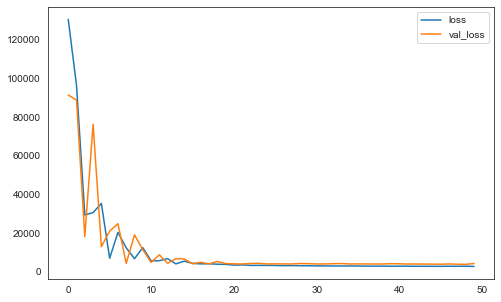

In [214]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [215]:
mse_test_RNAL=ts_model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 4631.1226


In [216]:
print(mse_test_RNAL)

4631.12255859375


In [217]:
preds_ts_model=ts_model.predict(X_test)
print(preds_ts_model)

[[1277.3466]
 [1255.8835]
 [1270.9109]
 [1350.6364]
 [1315.4888]
 [1309.5426]
 [1302.6149]
 [1300.751 ]
 [1273.7092]
 [1197.3318]
 [1181.9226]
 [1189.4817]
 [1191.5667]
 [1207.4312]
 [1234.9769]
 [1280.5775]
 [1315.509 ]
 [1289.843 ]
 [1272.277 ]
 [1307.8474]
 [1389.5264]
 [1435.4009]
 [1495.2301]
 [1493.4845]
 [1501.6903]
 [1481.2843]
 [1517.2068]
 [1583.5103]
 [1588.7733]
 [1606.8406]
 [1678.799 ]
 [1738.0956]
 [1802.1876]
 [1862.4957]
 [1965.3813]
 [1959.4152]
 [1874.8693]]


<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Gold Price')

Text(0, 0.5, 'Gold Price')

Text(0.5, 0, 'Index')

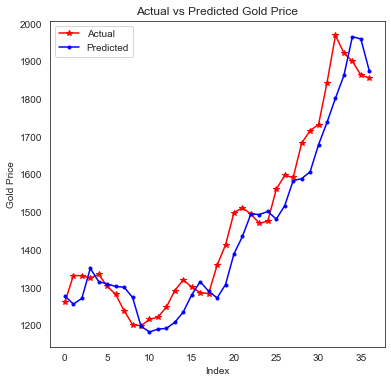

In [218]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(preds_ts_model.size), preds_ts_model, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Gold Price')
plt.ylabel('Gold Price')
plt.xlabel('Index')

# Modelamiento ARIMA




Fecha
2000-01-01    284.3
2000-02-01    299.9
2000-03-01    286.4
2000-04-01    279.7
2000-05-01    275.2
Freq: MS, Name: USdollar, dtype: float64

USdollar
Fecha               
2000-01-01     284.3
2000-02-01     299.9
2000-03-01     286.4
2000-04-01     279.7
2000-05-01     275.2

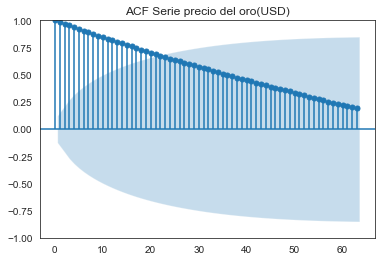

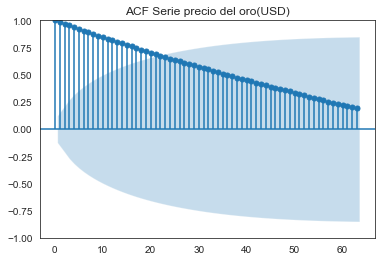

In [219]:
ts.head(5)
PrecioOro.head(5)

plot_acf(ts,adjusted=False,lags=(len(ts)/4),title='ACF Serie precio del oro(USD)')

## Prueba de Dickey-Fuller

In [221]:
from statsmodels.tsa.stattools import adfuller


resultadoadf=adfuller(train_ts,regression="nc",autolag=None, maxlag=1)####maxlag es importante

print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(train_ts,regression="nc",
                                               maxlag=1,autolag=None,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
pvalue

ADF Statistic: 0.783425
P-value: 0.882108
	1%: -2.576
	5%: -1.942
	10%: -1.616


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.026
Method:                 Least Squares   F-statistic:                              3.818
Date:                Mon, 07 Feb 2022   Prob (F-statistic):                      0.0235
Time:                        13:29:41   Log-Likelihood:                         -1073.1
No. Observations:                 212   AIC:                                      2150.
Df Residuals:                     210   BIC:                                      2157.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0021      0.003      0.783      0.434      -0.003       0.007
x2             0.1735      0.068      2.538      0.012       0.039       0.308
==============================================================================
Omnibus:                       16.036   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.959
Skew:                           0.089   Prob(JB):                     2.34e-11
Kurtosis:                       5.348   Cond. No.                         26.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.8821081774900303

Al ser el valor p muy grande, no  podemos rechazar la hipótesis nula, lo cual implica que existe una raíz unitaria.

### Diferenciacion


In [222]:
dtrain_ts=train_ts.diff(periods=1)
dtrain_ts=dtrain_ts[1:]
dtrain_ts.head(5)
len(dtrain_ts)

Fecha
2000-02-01    15.6
2000-03-01   -13.5
2000-04-01    -6.7
2000-05-01    -4.5
2000-06-01    10.5
Freq: MS, Name: USdollar, dtype: float64

213

In [223]:
resultadoadfseriedif=adfuller(dtrain_ts,regression="nc",autolag=None, maxlag=1)####maxlag es importante

print('ADF Statistic: %f' % resultadoadfseriedif[0])
print('P-value: %f' % resultadoadfseriedif[1])
for key, value in resultadoadfseriedif[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(dif_ts,regression="nc",maxlag=1,autolag=None,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()

ADF Statistic: -9.607798
P-value: 0.000000
	1%: -2.576
	5%: -1.942
	10%: -1.616


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.390
Model:                            OLS   Adj. R-squared (uncentered):              0.385
Method:                 Least Squares   F-statistic:                              78.82
Date:                Mon, 07 Feb 2022   Prob (F-statistic):                    3.35e-27
Time:                        13:29:43   Log-Likelihood:                         -1266.6
No. Observations:                 249   AIC:                                      2537.
Df Residuals:                     247   BIC:                                      2544.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8035      0.079    -10.123      0.000      -0.960      -0.647
x2             0.0332      0.064      0.522      0.602      -0.092       0.159
==============================================================================
Omnibus:                       17.416   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.455
Skew:                           0.243   Prob(JB):                     3.66e-10
Kurtosis:                       4.988   Cond. No.                         2.16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Concluimos que la serie, tiene solo una raiz unitaria

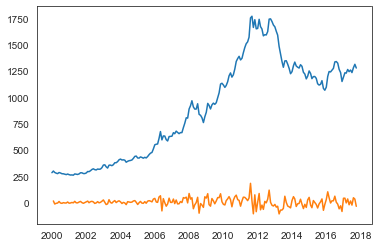

In [224]:
plt.plot(train_ts)
plt.plot(dtrain_ts)

## Graficos de autocorrelacion

In [225]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

### Autocorrelacion Parcial

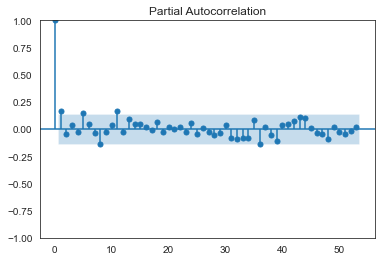

In [226]:
graph1=plot_pacf(dtrain_ts,lags=(len(dtrain_ts)/4),method='ldbiased')

consideramos que el modelo de la serie diferenciada puede ser un AR(1) o un AR(11)

### Autocorrelacion Simple

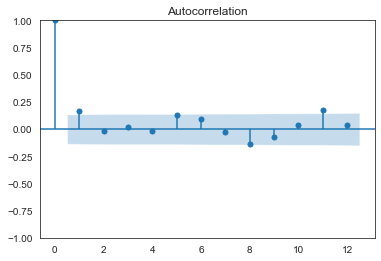

In [227]:
graph2=plot_acf(dtrain_ts,lags=(12),adjusted=False)

consideramos que el modelo de la serie diferenciada puede ser un MA(1) o un ARMA(1,1)

Se puede postular a la serie diferenciada tres posibles modelos(AR(1),MA(1),ARMA(1,1)), eso implica que los posibles modelos para la serie original serían

- ARIMA(11,1,0) 
- ARIMA(0,1,11) 
- ARIMA(11,1,11)

# Comparacion

In [254]:
# pip install tabulate

In [255]:
from tabulate import tabulate

In [256]:
print(ms_error_SE)

76677.96373382669


In [257]:
print(ms_error_AD)

11410.001544519131


In [258]:
print(mse_test_RN1)
print(mse_test_RN2)

3244.4765625
3380.412109375


In [259]:
print(mse_test_RNAL)

4631.12255859375


In [262]:
#create data
data = [["Suavizamiento Exponencial", ms_error_SE],
        ["Holt Winters", ms_error_HW], 
        ["Arboles de desicion", ms_error_AD], 
        ["Red Neuronal 1 ", mse_test_RN1], 
        ["Red Neuronal 2 ", mse_test_RN2], 
        ["Redes Neuronales (hiperparametros encontrados por algoritmo", mse_test_RNAL],
        ["Modelo ARIMA[0,1,2]", 0]]
  
#define header names
col_names = ["Modelamiento", "Error cuadratico medio"]
  
#display table
print(tabulate(data, headers=col_names))

Modelamiento                                                   Error cuadratico medio
-----------------------------------------------------------  ------------------------
Suavizamiento Exponencial                                                    76678
Holt Winters                                                                 76678
Arboles de desicion                                                          11410
Red Neuronal 1                                                                3244.48
Red Neuronal 2                                                                3380.41
Redes Neuronales (hiperparametros encontrados por algoritmo                   4631.12
Modelo ARIMA[0,1,2]                                                              0


In [261]:
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════════════════════════════════════════╤══════════════════════════╕
│ Modelamiento                                                │   Error cuadratico medio │
╞═════════════════════════════════════════════════════════════╪══════════════════════════╡
│ Suavizamiento Exponencial                                   │                 76678    │
├─────────────────────────────────────────────────────────────┼──────────────────────────┤
│ Holt Winters                                                │                 76678    │
├─────────────────────────────────────────────────────────────┼──────────────────────────┤
│ Arboles de desicion                                         │                 11410    │
├─────────────────────────────────────────────────────────────┼──────────────────────────┤
│ Red Neuronal 1                                              │                  3244.48 │
├─────────────────────────────────────────────────────────────┼──────────────────────────┤